Car SellingPrice Analysis
*Developed by (Name : Sai Sirisha NK)* 


## 1. Introduction

# Dataset Description
The dataset comes from Kaggle's "CarDekho Used Car Data" dataset, containing 15,411 observations. It includes various attributes about used cars, such as the brand, model, vehicle age, and the selling price. The dataset provides a rich set of variables that can be analyzed for insights related to used car pricing trends.

# Source: 
- Kaggle - CarDekho Used Car Data

# Data Variables (Features):

1. brand: The manufacturer of the car (categorical).
2. model: The model of the car (categorical).
3. vehicle_age: The age of the car in years (integer).
4. km_driven: The number of kilometers driven (integer).
5. fuel_type: Type of fuel used by the car (categorical: Petrol/Diesel).
6. transmission_type: Transmission type (categorical: Manual/Automatic).
7. mileage: Mileage in kilometers per liter (float).
8. engine: Engine capacity in cc (integer).
9. seats: Number of seats in the car (integer).
10. selling_price: The selling price of the used car (integer).

# Interest in the Dataset
- I am interested in this dataset because it provides a comprehensive look at the used car market. By exploring the factors that influence the price of used cars, such as vehicle age, mileage, and fuel type, we can gain insights into market dynamics and the key variables that affect pricing decisions.

# Research Objectives:
- Analyze how vehicle age and kilometers driven affect mileage in used cars.
- Investigate how engine size and vehicle age impact price for automatic vs. manual cars.
- Explore how fuel type affects car mileage and price differences.

# Goals:
- Identify factors contributing to high mileage in used cars.
- Understand key drivers of price differences between transmission types.
- Provide insights on efficiency and value differences between Petrol and Diesel cars.


### EDA Hypotheses (Ask you questions)

1. What factors contribute to high mileage in used cars?
- Reason for Interest: Mileage is a critical factor for buyers as it often reflects the car's usage and condition. Understanding what factors contribute to higher mileage (e.g., vehicle age, kilometers driven) can help identify which types of cars may be more likely to have higher mileage, providing valuable insights for buyers and sellers.
2. How does the combination of vehicle characteristics affect the selling price of automatic vs. manual transmission cars?
- Reason for Interest: Transmission type (automatic vs. manual) can significantly impact the selling price of a car. By analyzing the interactions between vehicle characteristics (e.g., engine size, vehicle age) for different transmission types, this question can reveal which features drive the value of each type, allowing for a deeper understanding of price differences and consumer preferences.
3. How does fuel type (Petrol vs. Diesel) influence car performance in terms of mileage and price?
- Reason for Interest: Fuel type is a major consideration for car buyers, especially when it comes to performance and cost. Investigating how petrol and diesel cars differ in terms of mileage and price can provide insights into which fuel types offer better efficiency and value, helping buyers make informed decisions based on their priorities.


## 2. Data Analysis

### 2-1. Importing the libraries necessary for your EDA



In [2]:
# Import your data easy to read
# Import your data easy to read
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('cardekho_dataset.xlsx')
df.head()

brand     model  vehicle_age  km_driven fuel_type transmission_type  \
0   Maruti      Alto            9     120000    Petrol            Manual   
1  Hyundai     Grand            5      20000    Petrol            Manual   
2  Hyundai       i20           11      60000    Petrol            Manual   
3   Maruti      Alto            9      37000    Petrol            Manual   
4     Ford  Ecosport            6      30000    Diesel            Manual   

   mileage  engine  seats  selling_price  
0    19.70     796      5         120000  
1    18.90    1197      5         550000  
2    17.00    1197      5         215000  
3    20.92     998      5         226000  
4    22.77    1498      5         570000

### 2-2. Import libraries for EDA


In [3]:
# Import libraries for EDA 
# Import libraries for EDA 
## Imported required libraries in 2.1 already
# Import your data easy to read
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2-3. Review Data


In [32]:
# 1. Check data dimension by using .shape
df.shape ## displays the shape of dataframe

(15411, 10)

In [33]:
# 2. Check types of data by .info() ; .dtype
df.info() # Displays DataFrame summary, including types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   model              15411 non-null  object 
 2   vehicle_age        15411 non-null  int64  
 3   km_driven          15411 non-null  int64  
 4   fuel_type          15411 non-null  object 
 5   transmission_type  15411 non-null  object 
 6   mileage            15411 non-null  float64
 7   engine             15411 non-null  int64  
 8   seats              15411 non-null  int64  
 9   selling_price      15411 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.2+ MB


In [6]:
df.dtypes  ## displays data types of all the variables in the dataframe

brand                 object
model                 object
vehicle_age            int64
km_driven              int64
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
seats                  int64
selling_price          int64
dtype: object

In [7]:
# 3. For quantitative variable, generate a table for the count, mean, standard deviation, minimum and maximum values and the quantities of the data 
df.describe() ## displays descriptive statistics summary for numeric variables

vehicle_age     km_driven       mileage        engine         seats  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.036338  5.561648e+04     19.701151   1486.057751      5.325482   
std        3.013291  5.161855e+04      4.171265    521.106696      0.807628   
min        0.000000  1.000000e+02      4.000000    793.000000      0.000000   
25%        4.000000  3.000000e+04     17.000000   1197.000000      5.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000      5.000000   
75%        8.000000  7.000000e+04     22.700000   1582.000000      5.000000   
max       29.000000  3.800000e+06     33.540000   6592.000000      9.000000   

       selling_price  
count   1.541100e+04  
mean    7.749711e+05  
std     8.941284e+05  
min     4.000000e+04  
25%     3.850000e+05  
50%     5.560000e+05  
75%     8.250000e+05  
max     3.950000e+07

### 2-4. Generate Sub-dataset

In [31]:
# 1. Make sub-dataset(s) from your original dataset for your research objective, goals by dropping unnecessary variables 
# Creating sub-datasets for each of the three questions by dropping unnecessary variables

# Load the dataset again for subsetting purposes
data_sub = df.copy() # Creates a duplicate DataFrame copy.

# Sub-dataset for question 1: Factors contributing to high mileage
mileage_dataset = data_sub.drop(columns=['brand', 'model', 'selling_price','seats']) # Removes specified columns from DataFrame.

# Sub-dataset for question 2: Vehicle characteristics affecting price of automatic vs. manual transmission cars
transmission_dataset = data_sub.drop(columns=[ 'vehicle_age', 'km_driven', 'seats','brand','model'])

# Sub-dataset for question 3: Influence of fuel type on performance (mileage) and price
fuel_performance_dataset = data_sub.drop(columns=['brand', 'model', 'vehicle_age', 'km_driven','transmission_type', 'seats', 'engine'])

# Display the first few rows of each sub-dataset to ensure they are created correctly
mileage_dataset.head(), transmission_dataset.head(), fuel_performance_dataset.head()

(   vehicle_age  km_driven fuel_type transmission_type  mileage  engine
 0            9     120000    Petrol            Manual    19.70     796
 1            5      20000    Petrol            Manual    18.90    1197
 2           11      60000    Petrol            Manual    17.00    1197
 3            9      37000    Petrol            Manual    20.92     998
 4            6      30000    Diesel            Manual    22.77    1498,
   fuel_type transmission_type  mileage  engine  selling_price
 0    Petrol            Manual    19.70     796         120000
 1    Petrol            Manual    18.90    1197         550000
 2    Petrol            Manual    17.00    1197         215000
 3    Petrol            Manual    20.92     998         226000
 4    Diesel            Manual    22.77    1498         570000,
   fuel_type  mileage  selling_price
 0    Petrol    19.70         120000
 1    Petrol    18.90         550000
 2    Petrol    17.00         215000
 3    Petrol    20.92         226000
 4 

In [9]:
# 2. try to change variable names
# Renaming columns for better clarity in each sub-dataset

# Sub-dataset for question 1: Factors contributing to high mileage
mileage_dataset = mileage_dataset.rename(columns={
    'vehicle_age': 'age_of_vehicle',
    'transmission_type': 'gearbox_type',    
    'km_driven': 'kilometers_driven',
    'fuel_type': 'type_of_fuel',
    'mileage': 'car_mileage',
    'engine': 'engine_capacity'
}) # renaming the columns of dataframe

# Sub-dataset for question 2: Vehicle characteristics affecting price of automatic vs. manual transmission cars
transmission_dataset = transmission_dataset.rename(columns={
    'fuel_type': 'type_of_fuel',
    'transmission_type': 'gearbox_type',
    'mileage': 'car_mileage',
    'engine': 'engine_capacity',
    'selling_price': 'price'
})

# Sub-dataset for question 3: Influence of fuel type on performance (mileage) and price
fuel_performance_dataset = fuel_performance_dataset.rename(columns={
    'fuel_type': 'type_of_fuel',
    'mileage': 'car_mileage',
    'selling_price': 'price'
})

# Display the first few rows of each renamed sub-dataset
mileage_dataset.head(), transmission_dataset.head(), fuel_performance_dataset.head()


(   age_of_vehicle  kilometers_driven type_of_fuel gearbox_type  car_mileage  \
 0               9             120000       Petrol       Manual        19.70   
 1               5              20000       Petrol       Manual        18.90   
 2              11              60000       Petrol       Manual        17.00   
 3               9              37000       Petrol       Manual        20.92   
 4               6              30000       Diesel       Manual        22.77   
 
    engine_capacity  
 0              796  
 1             1197  
 2             1197  
 3              998  
 4             1498  ,
   type_of_fuel gearbox_type  car_mileage  engine_capacity   price
 0       Petrol       Manual        19.70              796  120000
 1       Petrol       Manual        18.90             1197  550000
 2       Petrol       Manual        17.00             1197  215000
 3       Petrol       Manual        20.92              998  226000
 4       Diesel       Manual        22.77         

In [34]:
# 3. check if there are missing values
# Checking for missing values in all sub-datasets

# Checking the number of missing values in the main dataset
missing_values_main = df.isnull().sum()

# Checking missing values in each sub-dataset
missing_values_mileage = mileage_dataset.isnull().sum()
missing_values_transmission = transmission_dataset.isnull().sum()
missing_values_fuel_performance = fuel_performance_dataset.isnull().sum()

missing_values_main, missing_values_mileage, missing_values_transmission, missing_values_fuel_performance


(brand                0
 model                0
 vehicle_age          0
 km_driven            0
 fuel_type            0
 transmission_type    0
 mileage              0
 engine               0
 seats                0
 selling_price        0
 dtype: int64,
 vehicle_age          0
 km_driven            0
 fuel_type            0
 transmission_type    0
 mileage              0
 engine               0
 dtype: int64,
 fuel_type            0
 transmission_type    0
 mileage              0
 engine               0
 selling_price        0
 dtype: int64,
 fuel_type        0
 mileage          0
 selling_price    0
 dtype: int64)

In [11]:
# 4. Check if there are duplicated values
# Checking for duplicates in the main dataset
duplicates_main = df.duplicated().sum()

# Checking for duplicates in each sub-dataset
duplicates_mileage = mileage_dataset.duplicated().sum()
duplicates_transmission = transmission_dataset.duplicated().sum()
duplicates_fuel_performance = fuel_performance_dataset.duplicated().sum()

duplicates_main, duplicates_mileage, duplicates_transmission, duplicates_fuel_performance


(189, 1919, 5858, 6391)

### 2-5. Checking Outliers

In [12]:
# check if quantitative variables have outliers.
# Check for outliers using the IQR method for each numeric variable

def detect_outliers(dataset, numeric_columns):
    outlier_report = {}
    for column in numeric_columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((dataset[column] < lower_bound) | (dataset[column] > upper_bound)).sum()
        outlier_report[column] = outliers
    return outlier_report

# Detecting outliers in each sub-dataset

numeric_columns_mileage = ['age_of_vehicle', 'kilometers_driven', 'car_mileage', 'engine_capacity']
numeric_columns_transmission = ['car_mileage', 'engine_capacity', 'price']
numeric_columns_fuel_performance = ['car_mileage', 'price']

# Outliers for mileage dataset
outliers_mileage = detect_outliers(mileage_dataset, numeric_columns_mileage)

# Outliers for transmission dataset
outliers_transmission = detect_outliers(transmission_dataset, numeric_columns_transmission)

# Outliers for fuel performance dataset
outliers_fuel_performance = detect_outliers(fuel_performance_dataset, numeric_columns_fuel_performance)

outliers_mileage, outliers_transmission, outliers_fuel_performance


({'age_of_vehicle': 154,
  'kilometers_driven': 466,
  'car_mileage': 88,
  'engine_capacity': 2130},
 {'car_mileage': 88, 'engine_capacity': 2130, 'price': 1386},
 {'car_mileage': 88, 'price': 1386})

In [13]:
# Function to remove outliers based on IQR method
def remove_outliers(dataset, numeric_columns):
    for column in numeric_columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    return dataset


# Remove outliers for mileage dataset
mileage_dataset_clean = remove_outliers(mileage_dataset, numeric_columns_mileage)

# Remove outliers for transmission dataset
transmission_dataset_clean = remove_outliers(transmission_dataset, numeric_columns_transmission)

# Remove outliers for fuel performance dataset
fuel_performance_dataset_clean = remove_outliers(fuel_performance_dataset, numeric_columns_fuel_performance)

# Display the cleaned datasets
mileage_dataset_clean.head(), transmission_dataset_clean.head(), fuel_performance_dataset_clean.head()


(   age_of_vehicle  kilometers_driven type_of_fuel gearbox_type  car_mileage  \
 0               9             120000       Petrol       Manual        19.70   
 1               5              20000       Petrol       Manual        18.90   
 2              11              60000       Petrol       Manual        17.00   
 3               9              37000       Petrol       Manual        20.92   
 4               6              30000       Diesel       Manual        22.77   
 
    engine_capacity  
 0              796  
 1             1197  
 2             1197  
 3              998  
 4             1498  ,
   type_of_fuel gearbox_type  car_mileage  engine_capacity   price
 0       Petrol       Manual        19.70              796  120000
 1       Petrol       Manual        18.90             1197  550000
 2       Petrol       Manual        17.00             1197  215000
 3       Petrol       Manual        20.92              998  226000
 4       Diesel       Manual        22.77         

### 2-6. Generating Plot(s)

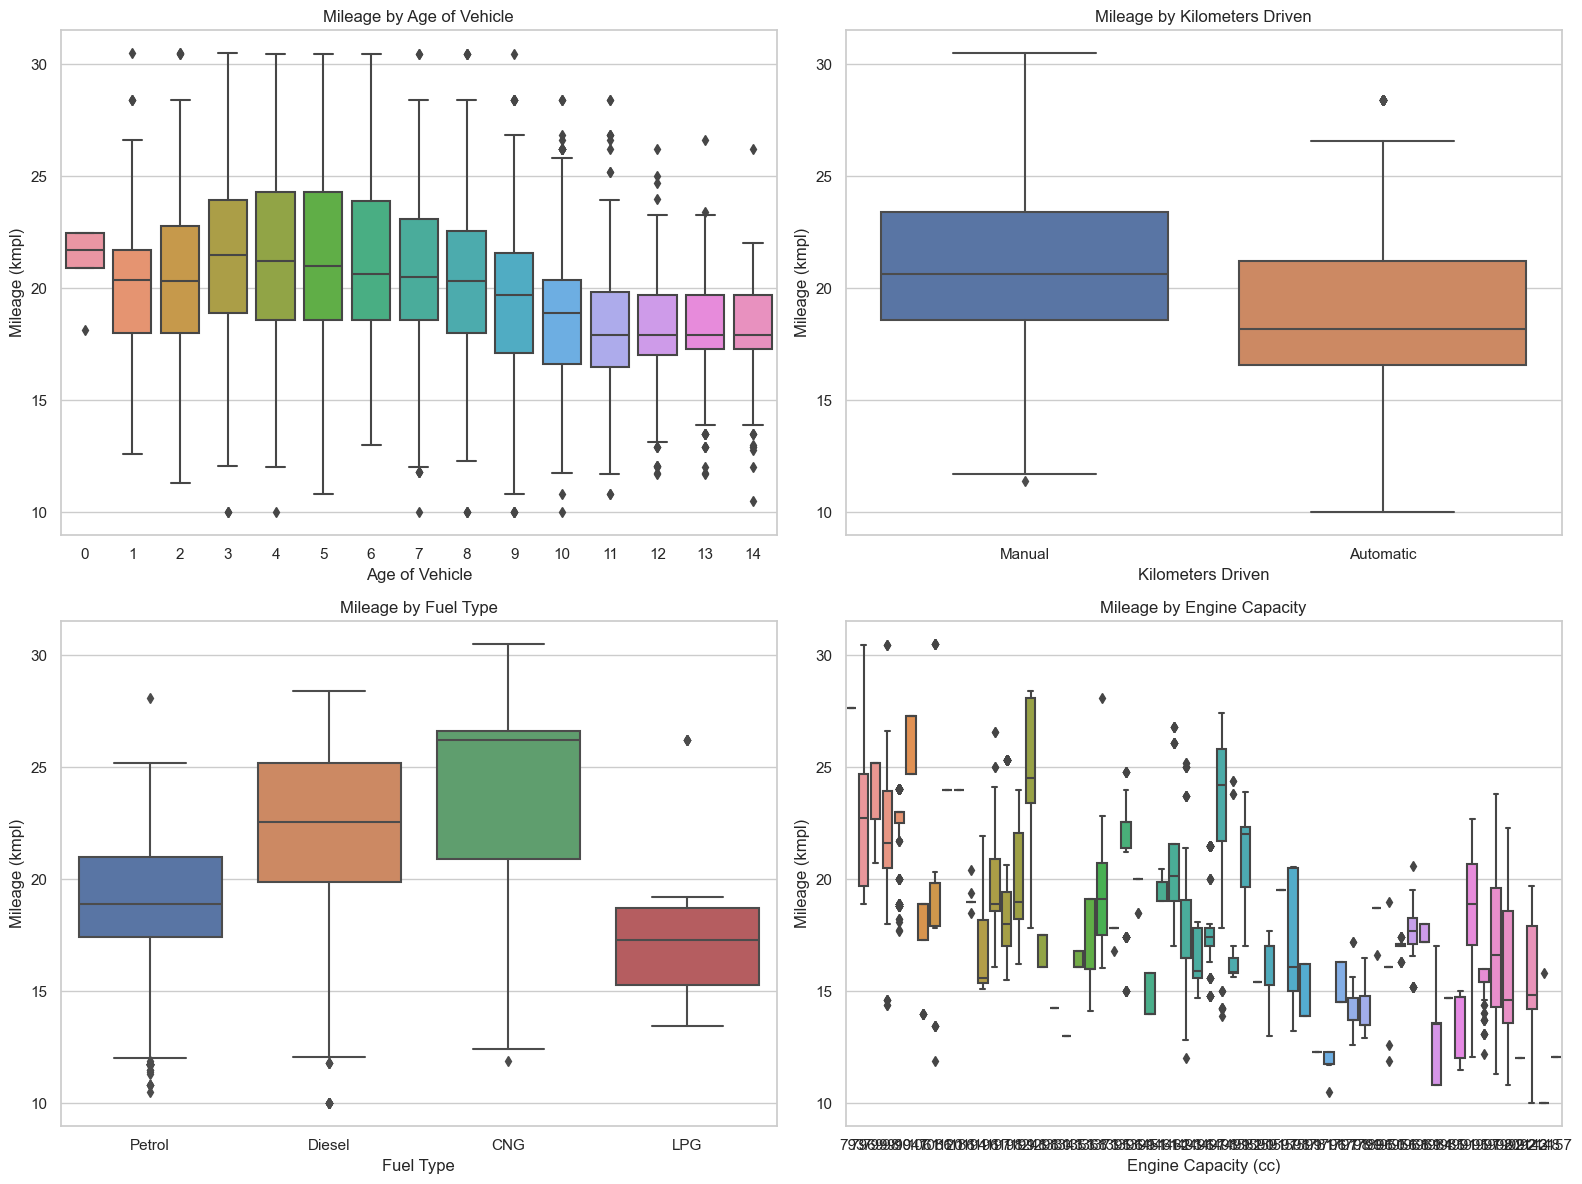

In [30]:
# generate plots to support your objective and goals
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

# Box Plot for factors contributing to high mileage
plt.figure(figsize=(16, 12))

# Box plot for Age of Vehicle
plt.subplot(2, 2, 1)
sns.boxplot(x='age_of_vehicle', y='car_mileage', data=mileage_dataset_clean)
plt.title('Mileage by Age of Vehicle')
plt.xlabel('Age of Vehicle')
plt.ylabel('Mileage (kmpl)')

# Box plot for Kilometers Driven
plt.subplot(2, 2, 2)
sns.boxplot(x='gearbox_type', y='car_mileage', data=mileage_dataset_clean)
plt.title('Mileage by Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Mileage (kmpl)')

# Box plot for Fuel Type
plt.subplot(2, 2, 3)
sns.boxplot(x='type_of_fuel', y='car_mileage', data=mileage_dataset_clean)
plt.title('Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (kmpl)')

# Box plot for Engine Capacity
plt.subplot(2, 2, 4)
sns.boxplot(x='engine_capacity', y='car_mileage', data=mileage_dataset_clean)
plt.title('Mileage by Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Mileage (kmpl)')

plt.tight_layout()
plt.show()


The box plots above provide insights into the factors contributing to high mileage.
- Older vehicles tend to have slightly lower mileage, but the variation is not extreme.
- Manual transmission vehicles tend to offer a higher mileage compared to automatic transmission vehicles, which shows a tighter distribution.
- Diesel vehicles generally offer higher mileage compared to petrol vehicles, as reflected in the higher median mileage for diesel cars.
- Smaller engine capacities tend to have higher mileage, while larger engines show lower mileage values, which is expected due to higher fuel consumption.

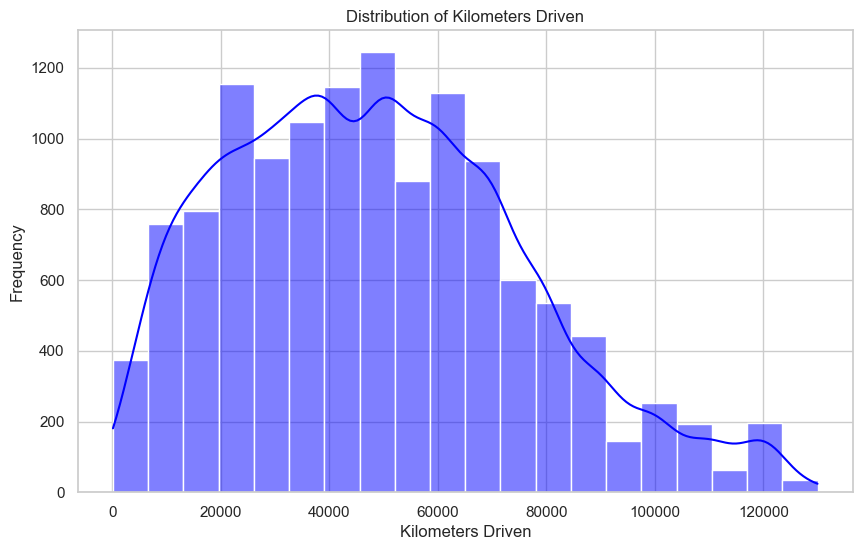

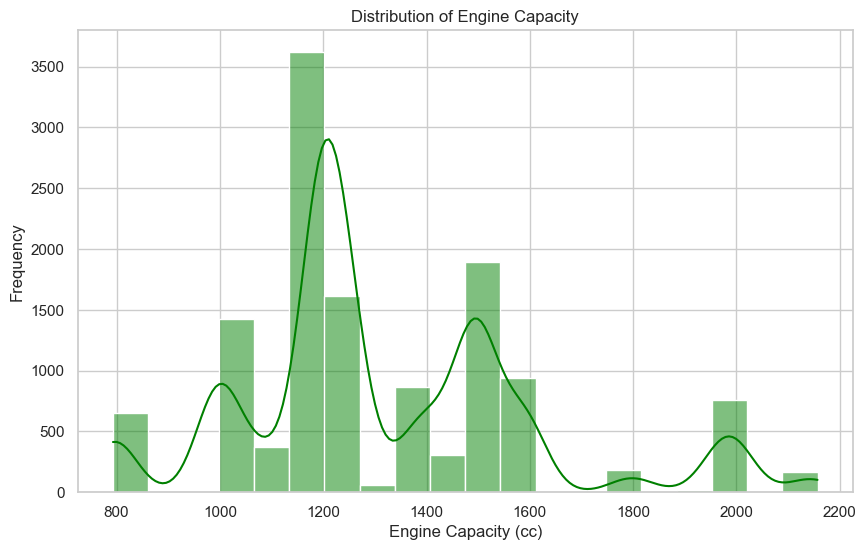

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

# Histogram for Kilometers Driven (Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(mileage_dataset_clean['kilometers_driven'], kde=True, color='blue', bins=20)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

# Histogram for Engine Capacity (Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(mileage_dataset_clean['engine_capacity'], kde=True, color='green', bins=20)
plt.title('Distribution of Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Frequency')
plt.show()



The histograms above provide a clear view of the distribution of two key variables in the dataset:
- The distribution shows that most vehicles have driven a moderate amount of kilometers, with fewer cars at both the lower and higher ends. The distribution is slightly skewed, indicating that there are more cars with higher kilometers driven.
- This distribution highlights that the majority of the vehicles have engine capacities clustered around certain common values (such as 1000cc to 1500cc), with fewer vehicles having engines that are either much smaller or much larger.

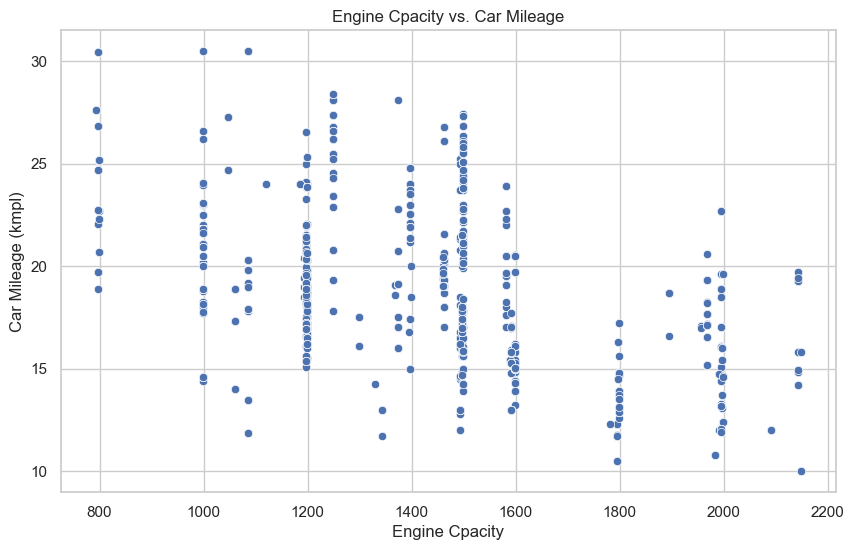

In [16]:
# Scatter Plot for Kilometers Driven vs Car Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_capacity', y='car_mileage', data=transmission_dataset_clean)
plt.title('Engine Cpacity vs. Car Mileage')
plt.xlabel('Engine Cpacity')
plt.ylabel('Car Mileage (kmpl)')
plt.show()

The scatter plot above shows the relationship between engine capacity and car mileage. Here are some key insights:
- As the engine capacity increases, there is a noticeable decline in car mileage, which is expected as larger engines typically consume more fuel.

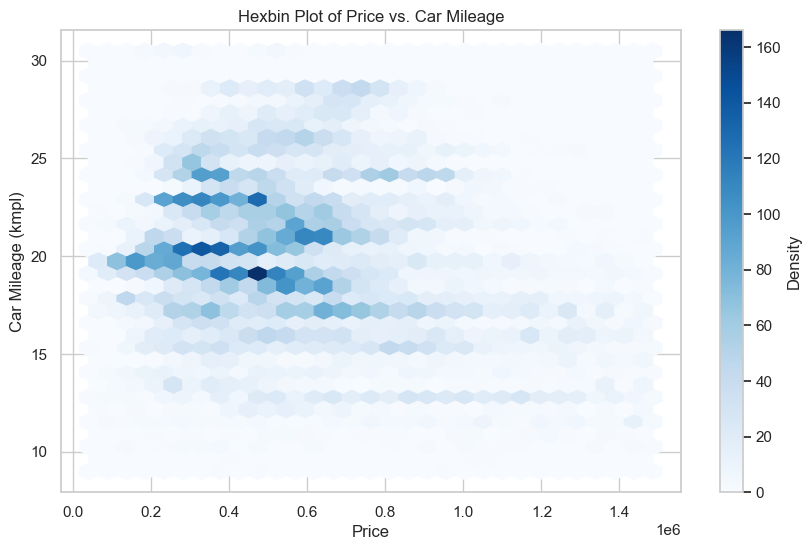

In [17]:
#  Hexbin Plot for Kilometers Driven vs Price (Alternative to Scatter Plot)
plt.figure(figsize=(10, 6))
plt.hexbin(fuel_performance_dataset_clean['price'], fuel_performance_dataset_clean['car_mileage'], gridsize=30, cmap='Blues')
plt.title('Hexbin Plot of Price vs. Car Mileage')
plt.xlabel('Price')
plt.ylabel('Car Mileage (kmpl)')
plt.colorbar(label='Density')
plt.show()


- The darker hexagons represent areas where many vehicles cluster around a particular price and mileage. These clusters indicate typical pricing ranges for vehicles with certain mileage.
- There is a slight tendency for higher-priced vehicles to have lower mileage, although the relationship isn't overly strong, suggesting other factors likely influence price beyond just mileage.

## 3. EDA


Question 1: What factors contribute to high mileage in used cars ?

In [28]:
mileage_dataset_clean.describe()

age_of_vehicle  kilometers_driven   car_mileage  engine_capacity
count    12869.000000       12869.000000  12869.000000     12869.000000
mean         5.789339       48798.379750     20.596419      1319.224959
std          2.810510       27197.863832      3.521140       284.008205
min          0.000000         100.000000     10.000000       793.000000
25%          4.000000       27700.000000     18.100000      1197.000000
50%          5.000000       47592.000000     20.360000      1248.000000
75%          8.000000       67000.000000     23.000000      1497.000000
max         14.000000      130000.000000     30.480000      2157.000000

In [18]:
# perform your EDA
# Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

# Summary statistics for Age of Vehicle
print("Summary Statistics for Age of Vehicle:")
print(mileage_dataset_clean['age_of_vehicle'].describe())

# Summary statistics for Kilometers Driven
print("\nSummary Statistics for Kilometers Driven:")
print(mileage_dataset_clean['kilometers_driven'].describe())

# Frequency count for Fuel Type
print("\nFuel Type Distribution:")
print(mileage_dataset_clean['type_of_fuel'].value_counts())

# Summary statistics for Engine Capacity
print("\nSummary Statistics for Engine Capacity:")
print(mileage_dataset_clean['engine_capacity'].describe())

# Summary statistics for Mileage
print("\nSummary Statistics for Mileage:")
print(mileage_dataset_clean['car_mileage'].describe())

# Frequency count for Fuel Type
print("\nTransmission Type Distribution:")
print(mileage_dataset_clean['gearbox_type'].value_counts())

# Visualizations
plt.figure(figsize=(16, 12))


Summary Statistics for Age of Vehicle:
count    12869.000000
mean         5.789339
std          2.810510
min          0.000000
25%          4.000000
50%          5.000000
75%          8.000000
max         14.000000
Name: age_of_vehicle, dtype: float64

Summary Statistics for Kilometers Driven:
count     12869.000000
mean      48798.379750
std       27197.863832
min         100.000000
25%       27700.000000
50%       47592.000000
75%       67000.000000
max      130000.000000
Name: kilometers_driven, dtype: float64

Fuel Type Distribution:
type_of_fuel
Petrol    7331
Diesel    5269
CNG        227
LPG         42
Name: count, dtype: int64

Summary Statistics for Engine Capacity:
count    12869.000000
mean      1319.224959
std        284.008205
min        793.000000
25%       1197.000000
50%       1248.000000
75%       1497.000000
max       2157.000000
Name: engine_capacity, dtype: float64

Summary Statistics for Mileage:
count    12869.000000
mean        20.596419
std          3.521140
min

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

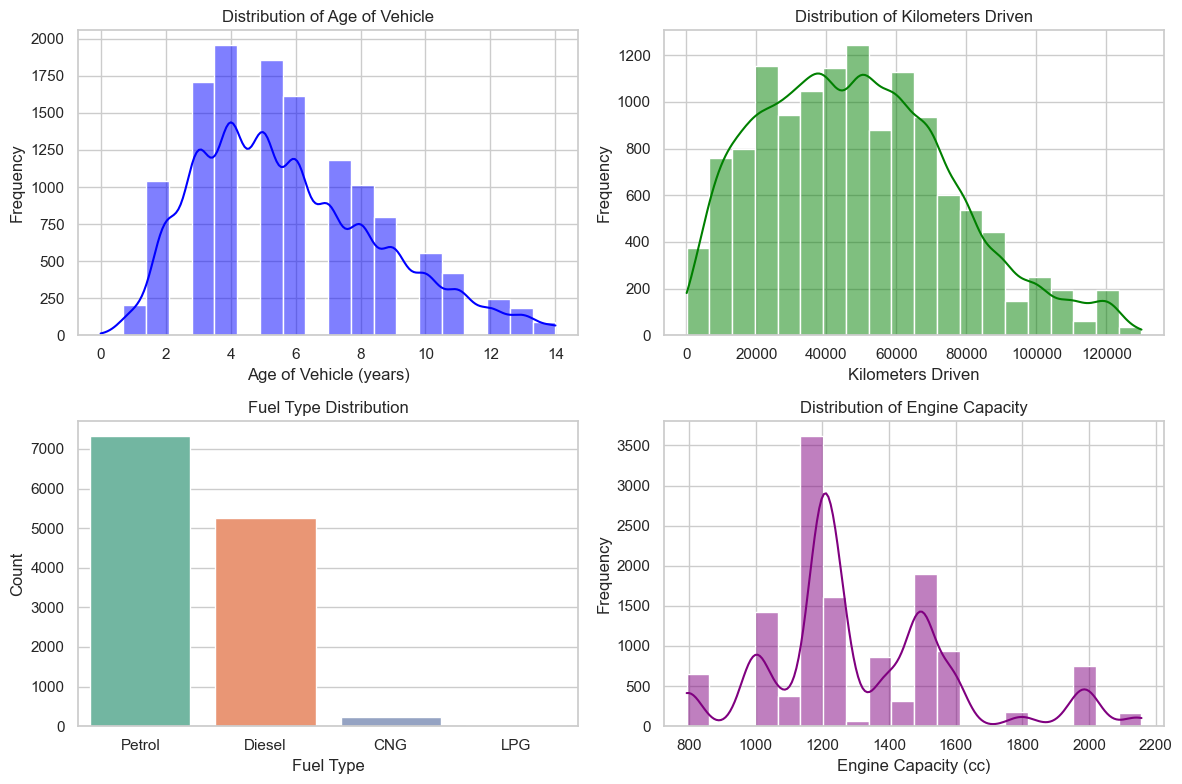

In [18]:
# Histogram for Age of Vehicle
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(mileage_dataset_clean['age_of_vehicle'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age of Vehicle')
plt.xlabel('Age of Vehicle (years)')
plt.ylabel('Frequency')

# Histogram for Kilometers Driven
plt.subplot(2, 2, 2)
sns.histplot(mileage_dataset_clean['kilometers_driven'], kde=True, bins=20, color='green')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')

# Bar plot for Fuel Type
plt.subplot(2, 2, 3)
sns.countplot(x='type_of_fuel', data=mileage_dataset_clean, palette='Set2')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Histogram for Engine Capacity
plt.subplot(2, 2, 4)
sns.histplot(mileage_dataset_clean['engine_capacity'], kde=True, bins=20, color='purple')
plt.title('Distribution of Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


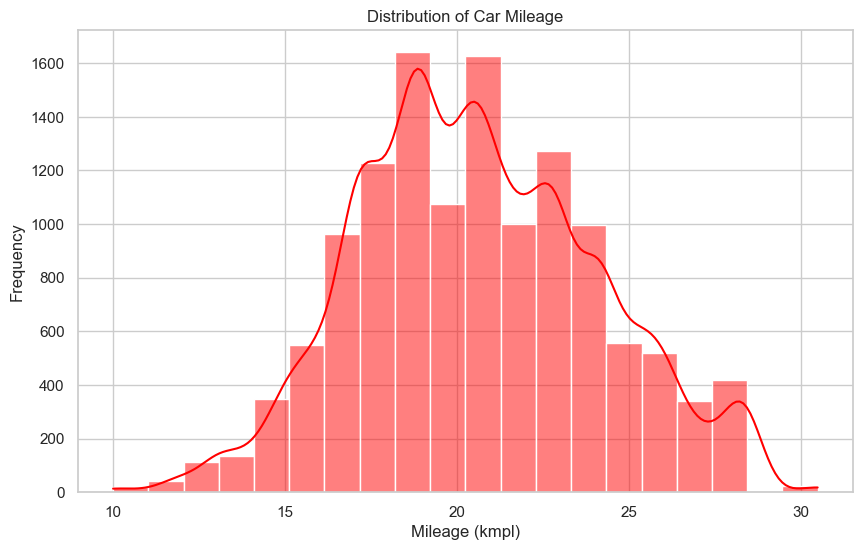

In [19]:
# Histogram for Mileage
plt.figure(figsize=(10, 6))
sns.histplot(mileage_dataset_clean['car_mileage'], kde=True, bins=20, color='red')
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Count')

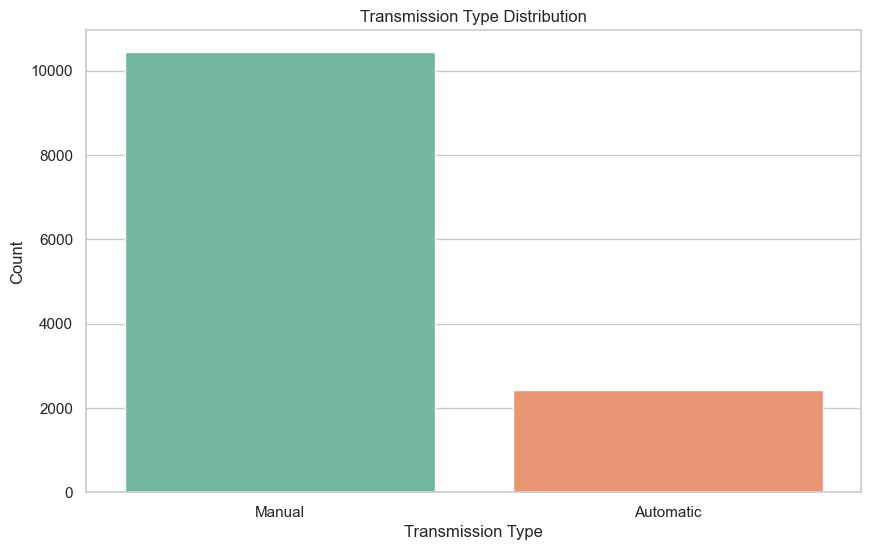

In [20]:
# Bar plot for Fuel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='gearbox_type', data=mileage_dataset_clean, palette='Set2')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

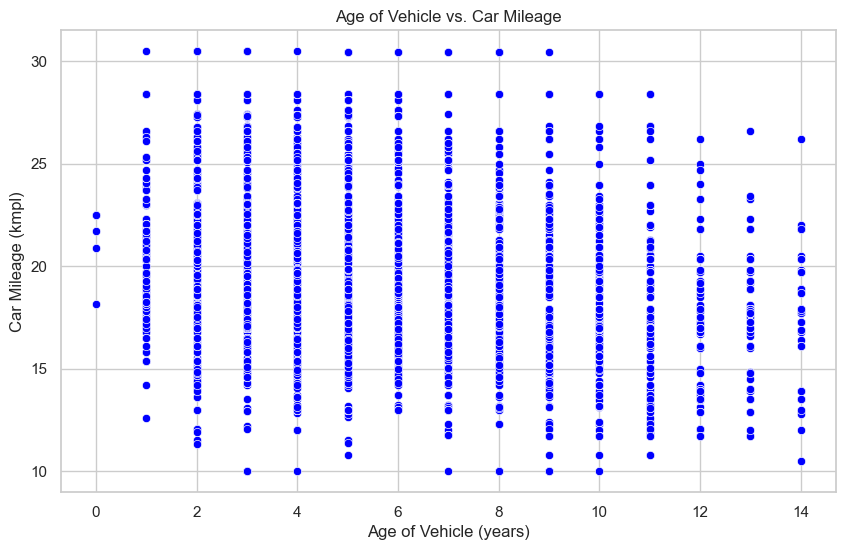

Correlation between Age of Vehicle and Car Mileage: -0.23


In [21]:
# Bivariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up Seaborn style
sns.set(style="whitegrid")

# Relationship between Age of Vehicle and Car Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_of_vehicle', y='car_mileage', data=mileage_dataset_clean, color='blue')
plt.title('Age of Vehicle vs. Car Mileage')
plt.xlabel('Age of Vehicle (years)')
plt.ylabel('Car Mileage (kmpl)')
plt.show()

# Calculate correlation
correlation_age_mileage = np.corrcoef(mileage_dataset_clean['age_of_vehicle'], mileage_dataset_clean['car_mileage'])[0, 1]
print(f"Correlation between Age of Vehicle and Car Mileage: {correlation_age_mileage:.2f}")

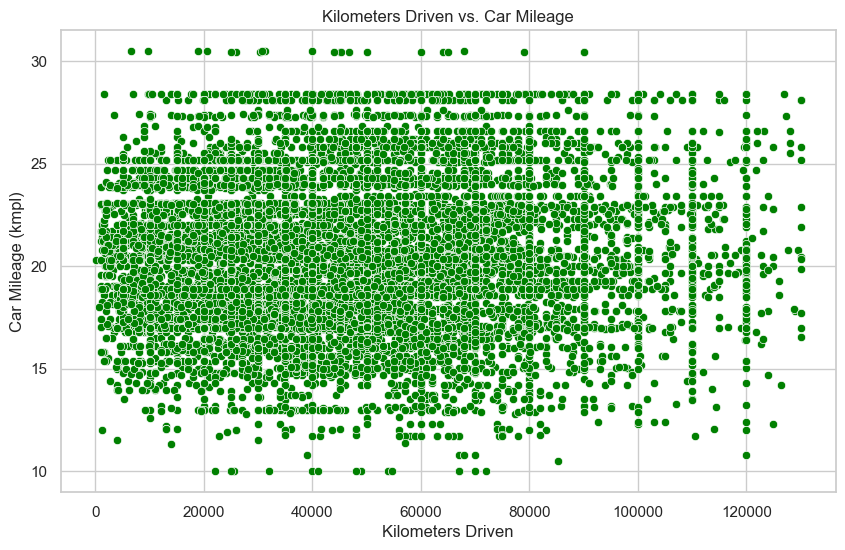

Correlation between Kilometers Driven and Car Mileage: 0.06


In [22]:
# Relationship between Kilometers Driven and Car Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometers_driven', y='car_mileage', data=mileage_dataset_clean, color='green')
plt.title('Kilometers Driven vs. Car Mileage')
plt.xlabel('Kilometers Driven')
plt.ylabel('Car Mileage (kmpl)')
plt.show()

# Calculate correlation
correlation_km_mileage = np.corrcoef(mileage_dataset_clean['kilometers_driven'], mileage_dataset_clean['car_mileage'])[0, 1]
print(f"Correlation between Kilometers Driven and Car Mileage: {correlation_km_mileage:.2f}")


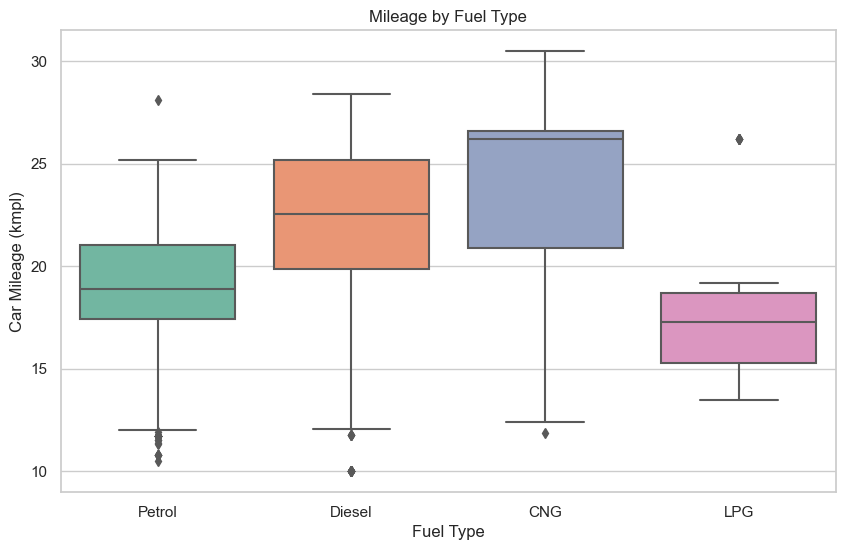


Summary Statistics for Mileage by Fuel Type:
               count       mean       std    min     25%    50%    75%    max
type_of_fuel                                                                 
CNG            227.0  23.703392  4.569385  11.88  20.880  26.20  26.60  30.48
Diesel        5269.0  22.305422  3.617784  10.00  19.870  22.54  25.20  28.40
LPG             42.0  17.953571  3.805650  13.45  15.275  17.30  18.70  26.20
Petrol        7331.0  19.287045  2.735209  10.50  17.400  18.90  21.01  28.09


In [23]:
# Comparison of Mileage by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_of_fuel', y='car_mileage', data=mileage_dataset_clean, palette='Set2')
plt.title('Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Car Mileage (kmpl)')
plt.show()

# Summary statistics for mileage by fuel type
print("\nSummary Statistics for Mileage by Fuel Type:")
print(mileage_dataset_clean.groupby('type_of_fuel')['car_mileage'].describe())

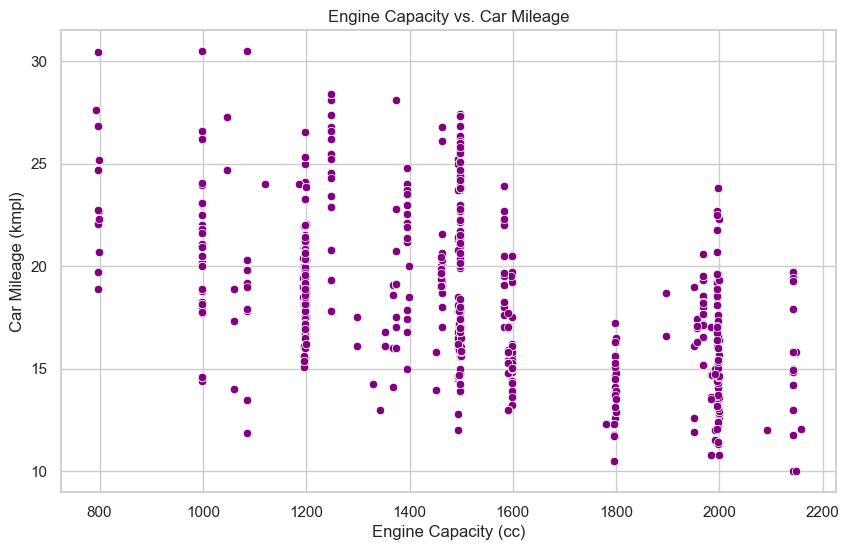

Correlation between Engine Capacity and Car Mileage: -0.38


In [24]:
# Relationship between Engine Capacity and Car Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_capacity', y='car_mileage', data=mileage_dataset_clean, color='purple')
plt.title('Engine Capacity vs. Car Mileage')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Car Mileage (kmpl)')
plt.show()

# Calculate correlation
correlation_engine_mileage = np.corrcoef(mileage_dataset_clean['engine_capacity'], mileage_dataset_clean['car_mileage'])[0, 1]
print(f"Correlation between Engine Capacity and Car Mileage: {correlation_engine_mileage:.2f}")

<Figure size 1200x1000 with 0 Axes>

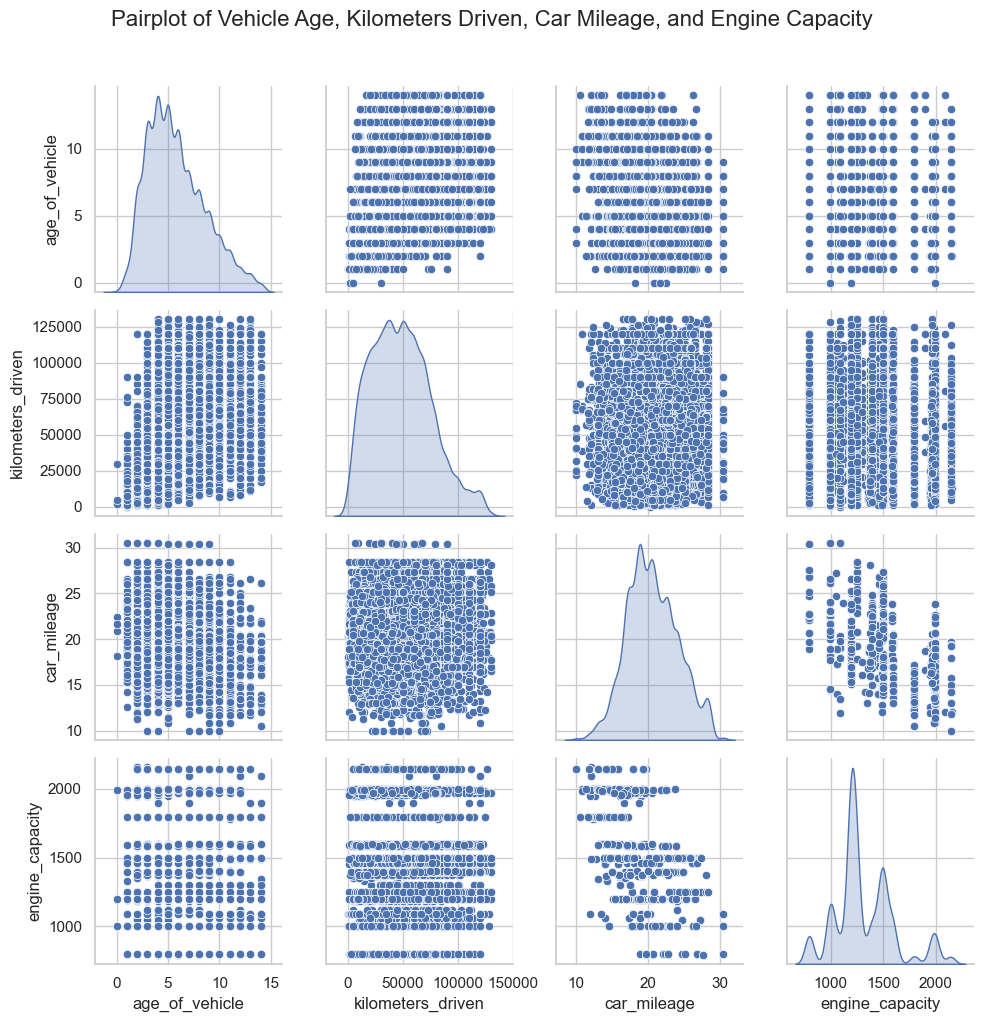

In [25]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Pair plot for multiple relationships, including Age of Vehicle and Car Mileage
plt.figure(figsize=(12, 10))
# Generate the pairplot
pairplot = sns.pairplot(mileage_dataset_clean[['age_of_vehicle', 'kilometers_driven', 'car_mileage', 'engine_capacity']], diag_kind='kde')

# Set the title outside the plot using plt.suptitle
plt.suptitle('Pairplot of Vehicle Age, Kilometers Driven, Car Mileage, and Engine Capacity', 
             y=1.02, fontsize=16)

# Adjust the layout to prevent title overlap
plt.tight_layout()

plt.show()

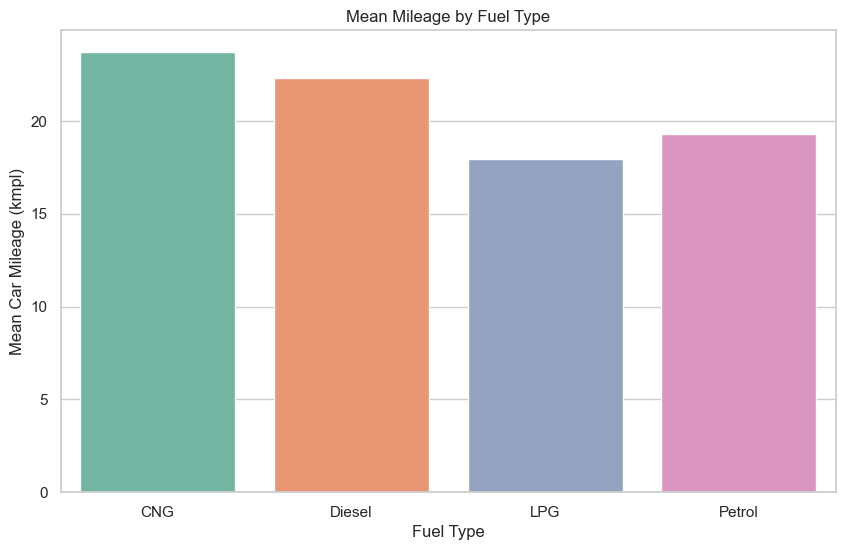

In [26]:
#  Bar Plot of Mean Mileage by Fuel Type
plt.figure(figsize=(10, 6))
fuel_mileage_mean = mileage_dataset_clean.groupby('type_of_fuel')['car_mileage'].mean().reset_index()
sns.barplot(x='type_of_fuel', y='car_mileage', data=fuel_mileage_mean, palette='Set2')
plt.title('Mean Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Car Mileage (kmpl)')
plt.show()


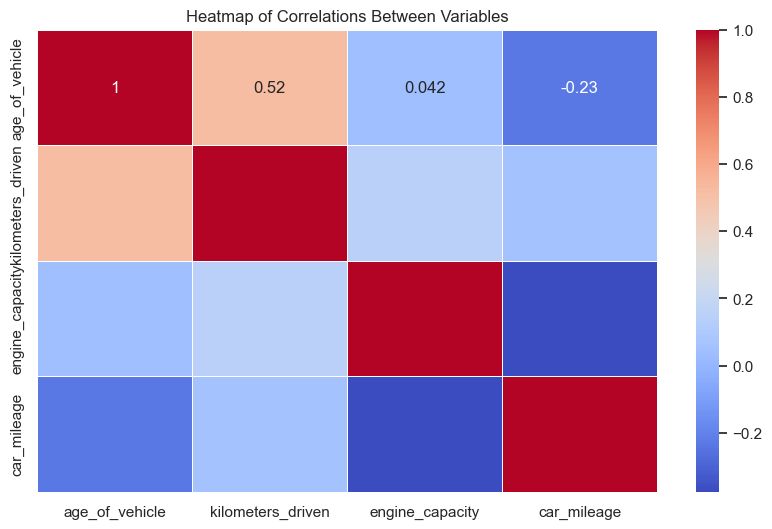

In [27]:
# multivariate analysis

# Calculate the correlation matrix
correlation_matrix = mileage_dataset_clean[['age_of_vehicle', 'kilometers_driven', 'engine_capacity', 'car_mileage']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations Between Variables')
plt.show()

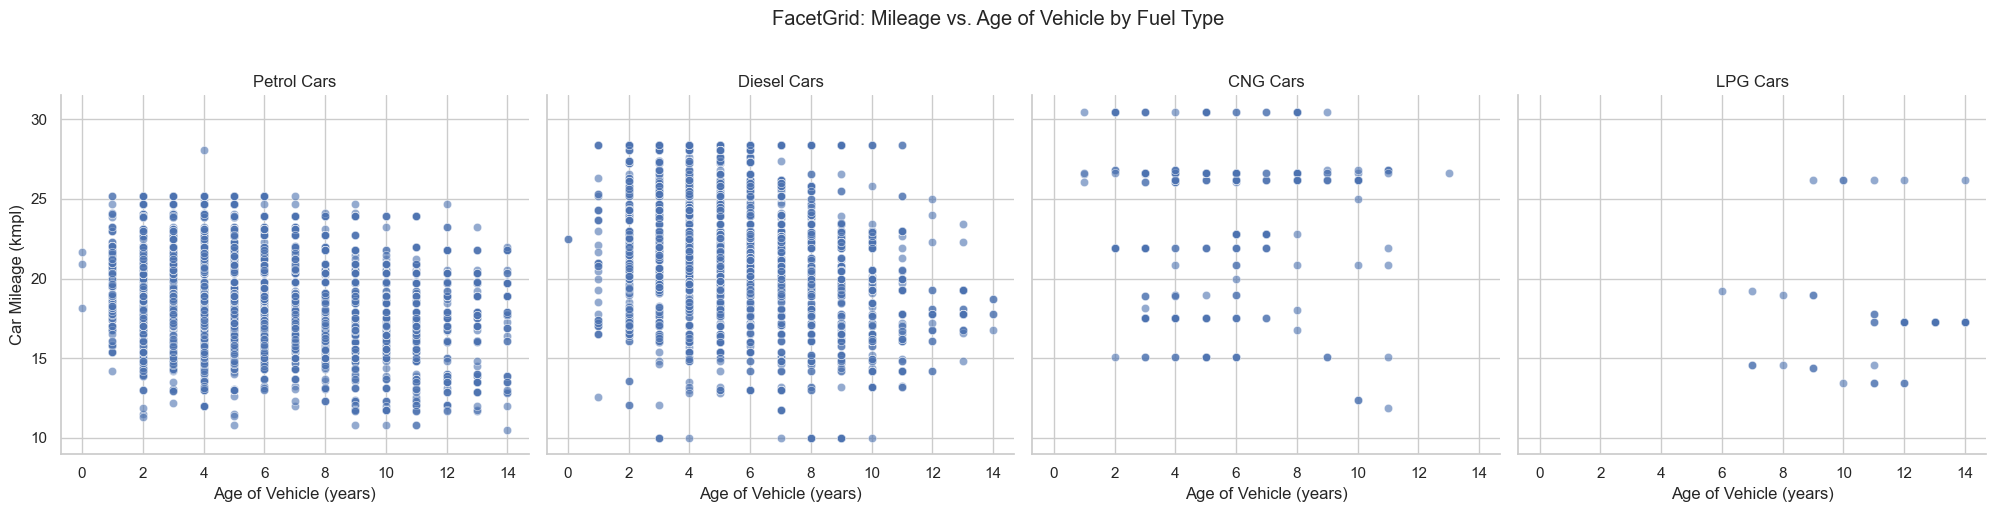

In [28]:
# Create a FacetGrid to examine the relationship between Age of Vehicle, Kilometers Driven, and Mileage by Fuel Type
g = sns.FacetGrid(mileage_dataset_clean, col="type_of_fuel", height=5, aspect=1)
g.map(sns.scatterplot, "age_of_vehicle", "car_mileage", alpha=0.6)
g.add_legend()

# Add titles and labels
g.set_axis_labels("Age of Vehicle (years)", "Car Mileage (kmpl)")
g.set_titles(col_template="{col_name} Cars")
plt.suptitle('FacetGrid: Mileage vs. Age of Vehicle by Fuel Type', y=1.02)
plt.tight_layout()
plt.show()

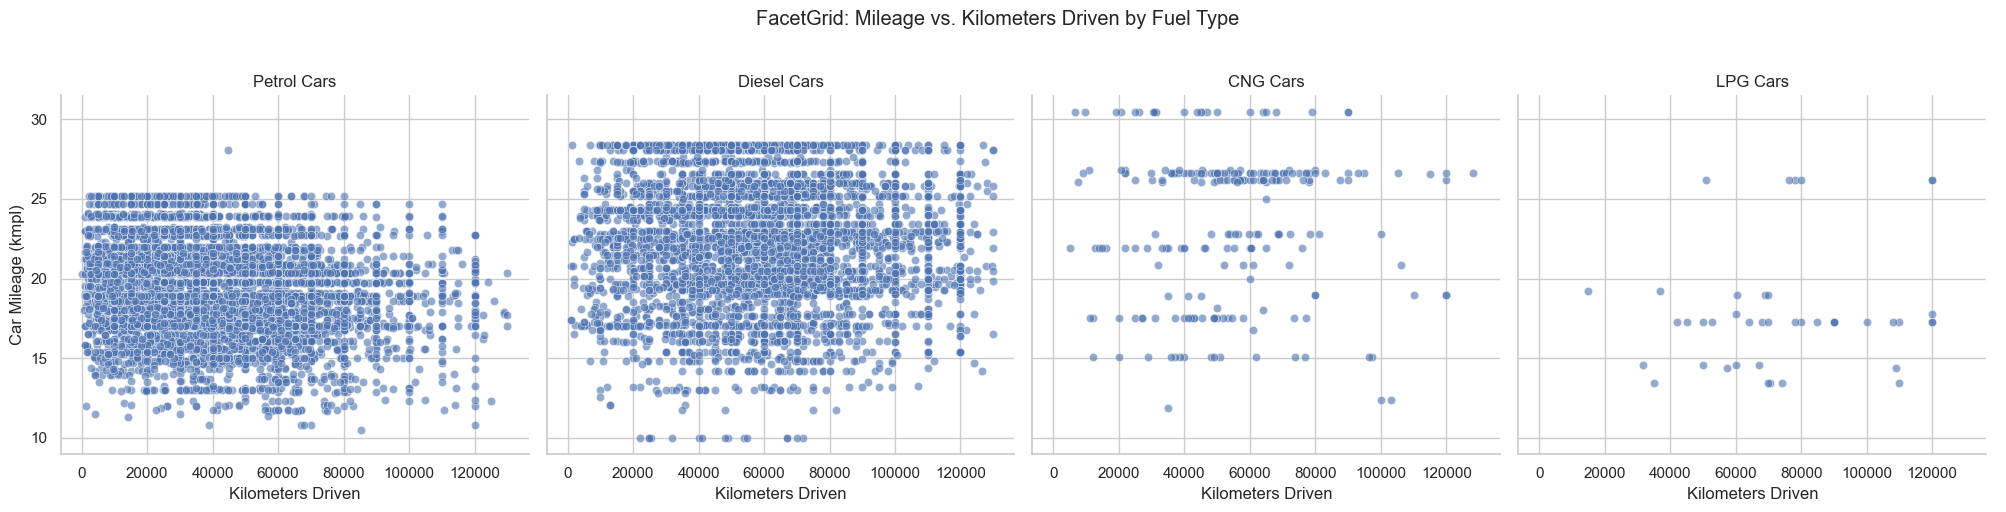

In [29]:
# FacetGrid for Kilometers Driven vs. Car Mileage by Fuel Type
g = sns.FacetGrid(mileage_dataset_clean, col="type_of_fuel", height=5, aspect=1)
g.map(sns.scatterplot, "kilometers_driven", "car_mileage", alpha=0.6)
g.add_legend()

# Add titles and labels
g.set_axis_labels("Kilometers Driven", "Car Mileage (kmpl)")
g.set_titles(col_template="{col_name} Cars")
plt.suptitle('FacetGrid: Mileage vs. Kilometers Driven by Fuel Type', y=1.02)
plt.tight_layout()
plt.show()


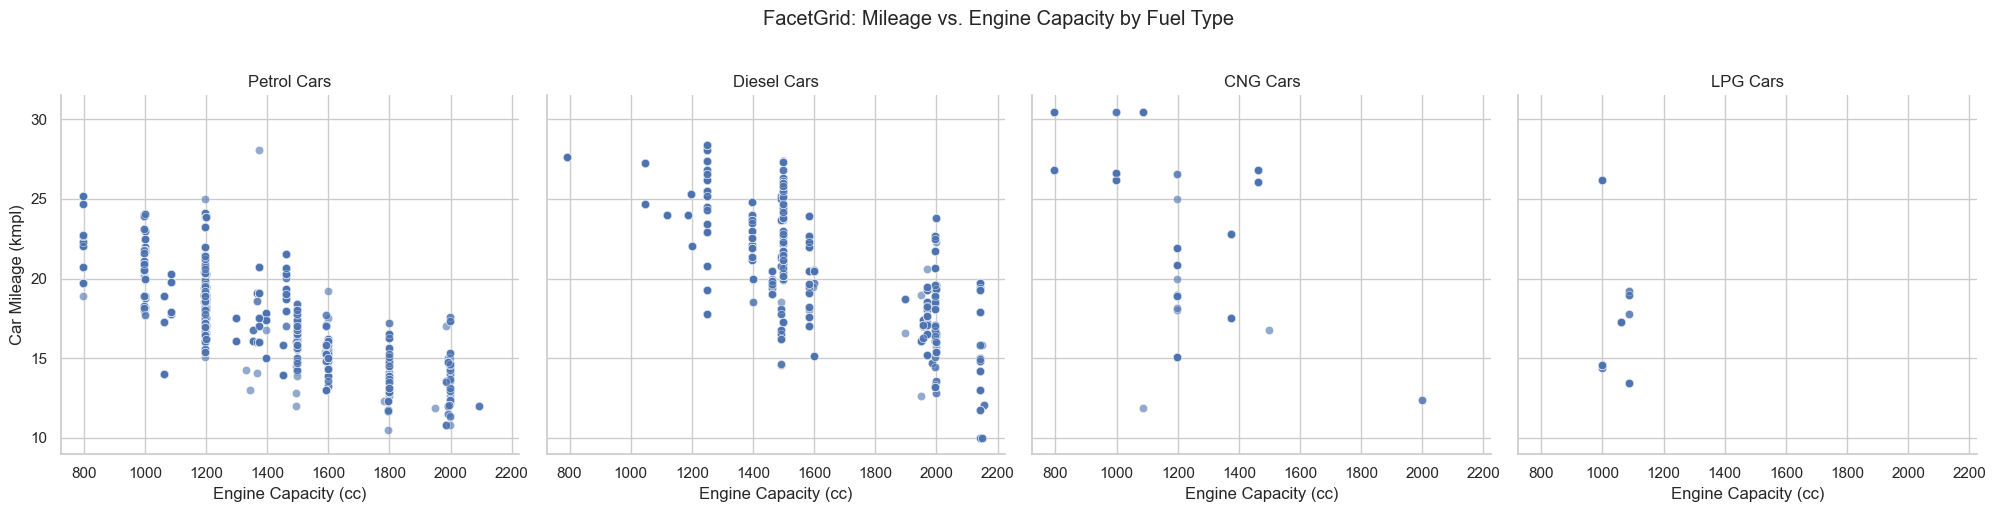

In [30]:
# FacetGrid for Engine Capacity vs. Car Mileage by Fuel Type
g = sns.FacetGrid(mileage_dataset_clean, col="type_of_fuel", height=5, aspect=1)
g.map(sns.scatterplot, "engine_capacity", "car_mileage", alpha=0.6)
g.add_legend()

# Add titles and labels
g.set_axis_labels("Engine Capacity (cc)", "Car Mileage (kmpl)")
g.set_titles(col_template="{col_name} Cars")
plt.suptitle('FacetGrid: Mileage vs. Engine Capacity by Fuel Type', y=1.02)
plt.tight_layout()
plt.show()


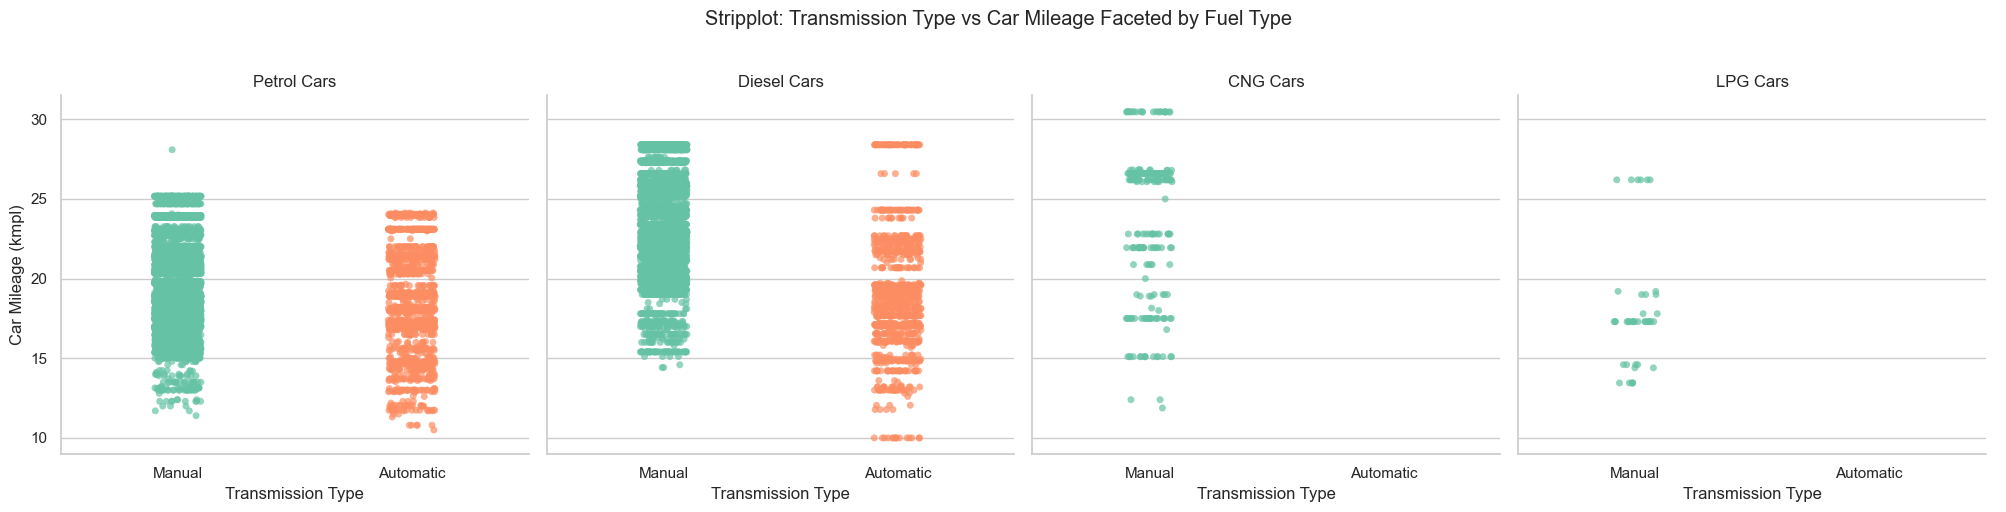

In [31]:
# FacetGrid to display transmission type vs car mileage faceted by fuel type
g = sns.FacetGrid(mileage_dataset_clean, col="type_of_fuel", height=5, aspect=1)
g.map(sns.stripplot, "gearbox_type", "car_mileage", jitter=True, palette="Set2", alpha=0.7)
g.add_legend()

# Add titles and labels
g.set_axis_labels("Transmission Type", "Car Mileage (kmpl)")
g.set_titles(col_template="{col_name} Cars")
plt.suptitle('Stripplot: Transmission Type vs Car Mileage Faceted by Fuel Type', y=1.02)
plt.tight_layout()
plt.show()


Question 2: How does the combination of vehicle characteristics affect the selling price of automatic vs. manual transmission cars?

In [27]:
transmission_dataset_clean.describe()

car_mileage  engine_capacity         price
count  12395.000000     12395.000000  1.239500e+04
mean      20.788276      1278.929407  5.371584e+05
std        3.458984       241.935832  2.418689e+05
min       10.000000       793.000000  4.000000e+04
25%       18.500000      1197.000000  3.500000e+05
50%       20.510000      1248.000000  5.000000e+05
75%       23.010000      1497.000000  6.800000e+05
max       30.480000      2148.000000  1.280000e+06

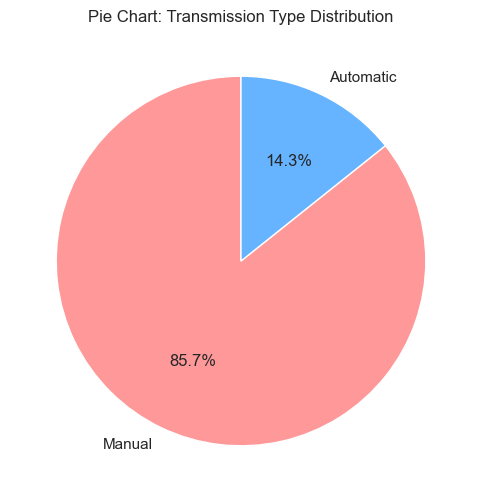

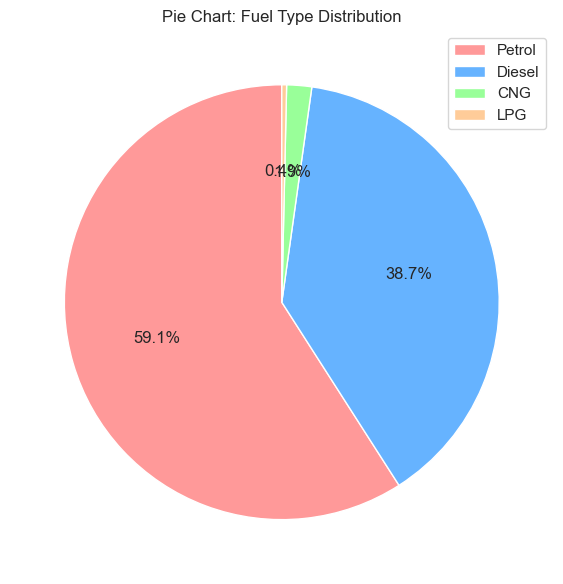

In [32]:
# Univariate Analysis
import matplotlib.pyplot as plt

# Pie chart for Transmission Type
plt.figure(figsize=(8, 6))
transmission_counts = transmission_dataset_clean['gearbox_type'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart: Transmission Type Distribution')
plt.show()

# Pie chart for Fuel Type
plt.figure(figsize=(8, 6))
fuel_counts = transmission_dataset_clean['type_of_fuel'].value_counts()

# Create pie chart without labels in the pie, and add a legend instead
plt.pie(fuel_counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Pie Chart: Fuel Type Distribution')

# Add a legend to show the labels
plt.legend(labels=fuel_counts.index, loc="best")
plt.tight_layout()
plt.show()



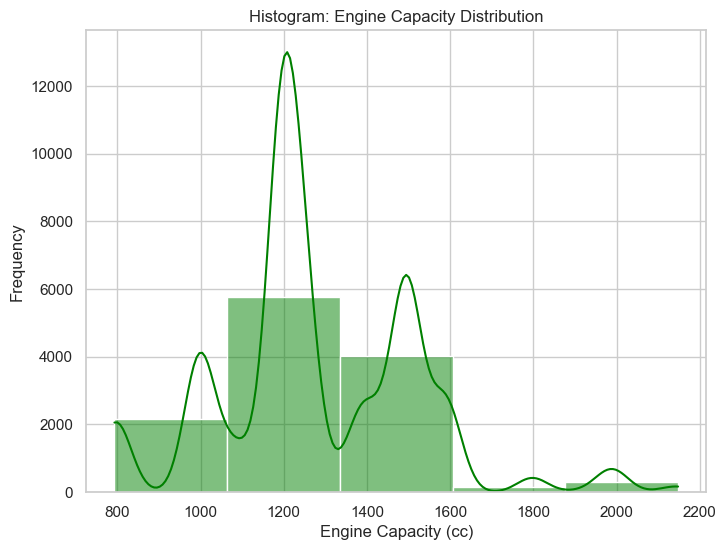

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(transmission_dataset_clean['engine_capacity'], kde=True, bins=5, color='green')
plt.title('Histogram: Engine Capacity Distribution')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Frequency')
plt.show()

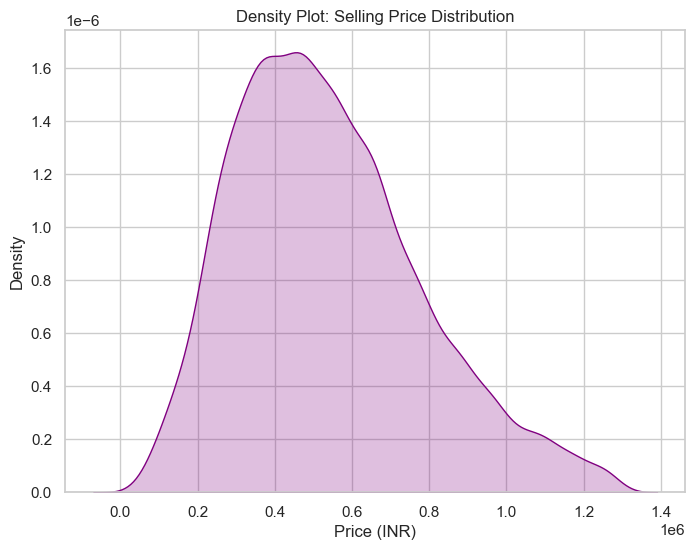

In [79]:
# Density Plot for Selling Price
plt.figure(figsize=(8, 6))
sns.kdeplot(transmission_dataset_clean['price'], fill=True, color='purple')
plt.title('Density Plot: Selling Price Distribution')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.show()

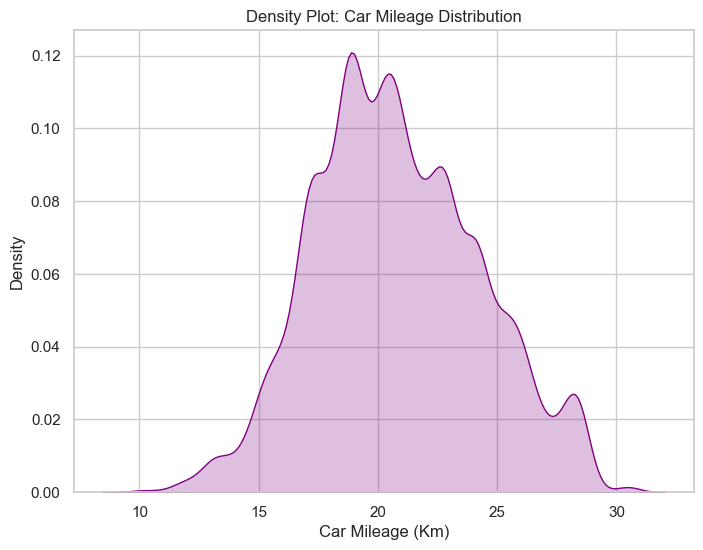

In [34]:
#  Density Plot for Selling Price
plt.figure(figsize=(8, 6))
sns.kdeplot(transmission_dataset_clean['car_mileage'], fill=True, color='purple')
plt.title('Density Plot: Car Mileage Distribution')
plt.xlabel('Car Mileage (Km)')
plt.ylabel('Density')
plt.show()

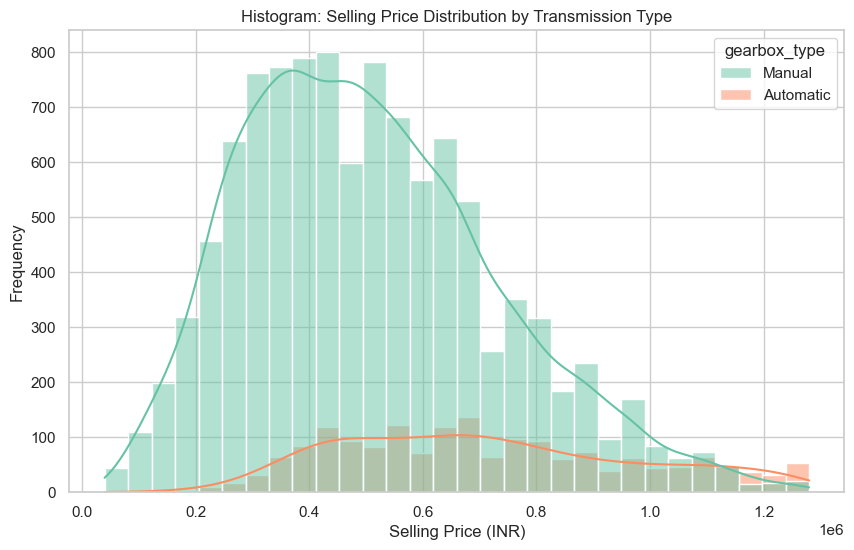

In [46]:
# Bivariate Analysis
# Histogram for Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(data=transmission_dataset_clean, x='price', hue='gearbox_type', kde=True, bins=30, palette="Set2")
plt.title('Histogram: Selling Price Distribution by Transmission Type')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Frequency')
plt.show()


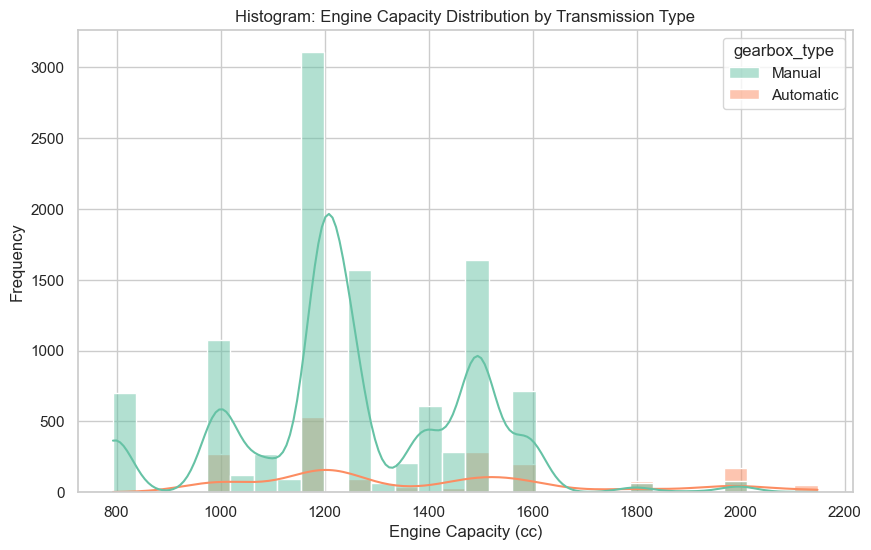

In [47]:
# Histogram for Engine Capacity
plt.figure(figsize=(10, 6))
sns.histplot(data=transmission_dataset_clean, x='engine_capacity', hue='gearbox_type', kde=True, bins=30, palette="Set2")
plt.title('Histogram: Engine Capacity Distribution by Transmission Type')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Frequency')
plt.show()


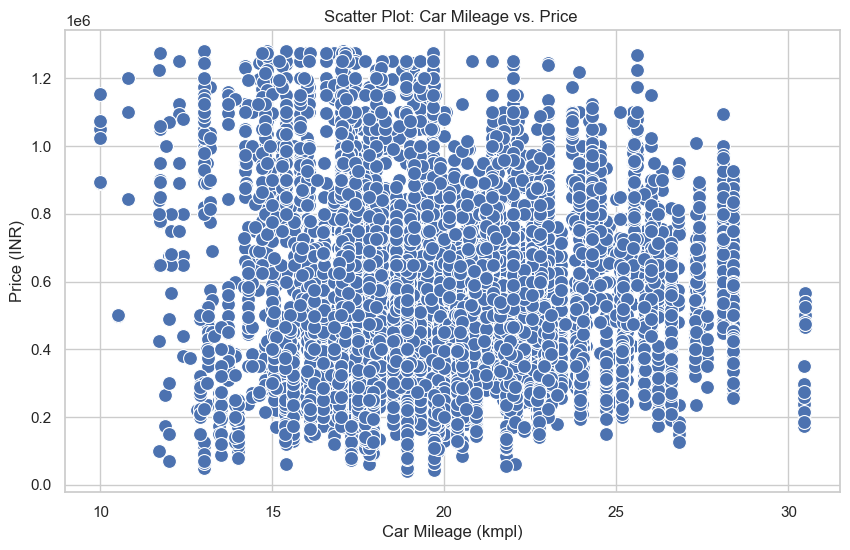

In [67]:
# Scatter Plot for Car Mileage vs. Price with Gearbox Type as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='car_mileage', y='price',  data=transmission_dataset_clean, palette='Set2', s=100)
plt.title('Scatter Plot: Car Mileage vs. Price ')
plt.xlabel('Car Mileage (kmpl)')
plt.ylabel('Price (INR)')
plt.show()


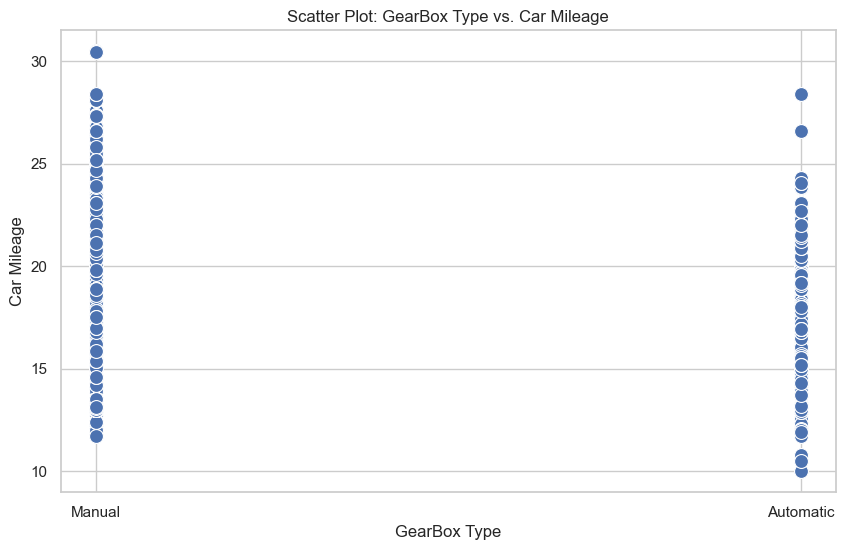

In [69]:
# Scatter Plot for Car Mileage vs. Price with Gearbox Type as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gearbox_type', y='car_mileage',  data=transmission_dataset_clean, palette='Set2', s=100)
plt.title('Scatter Plot: GearBox Type vs. Car Mileage')
plt.xlabel('GearBox Type')
plt.ylabel('Car Mileage')
plt.show()


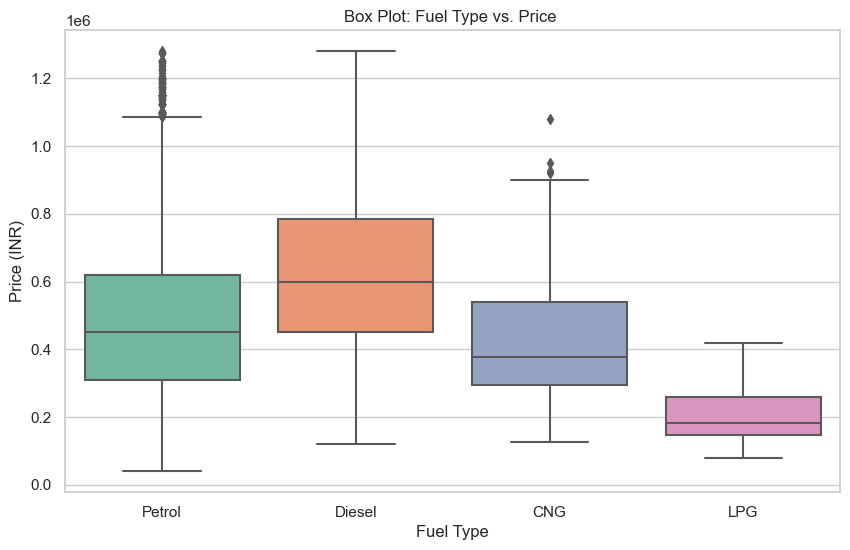

In [70]:

# Box Plot for Type of Fuel vs. Price by Gearbox Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_of_fuel', y='price', data=transmission_dataset_clean, palette='Set2')
plt.title('Box Plot: Fuel Type vs. Price ')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()


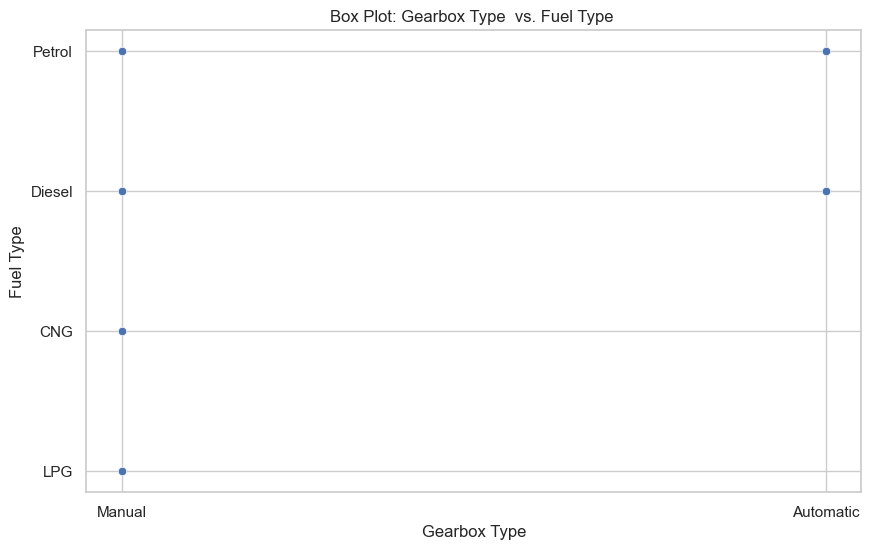

In [71]:

# Box Plot for Type of Fuel vs. Price by Gearbox Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gearbox_type', y='type_of_fuel', data=transmission_dataset_clean, palette='Set2')
plt.title('Box Plot: Gearbox Type  vs. Fuel Type ')
plt.xlabel('Gearbox Type')
plt.ylabel('Fuel Type')
plt.show()


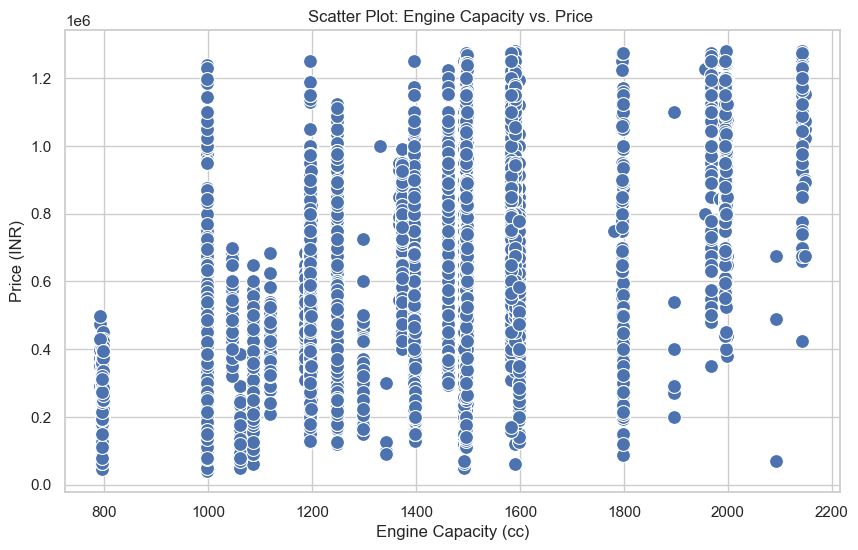

In [72]:

# Scatter Plot for Engine Capacity vs. Price with Gearbox Type as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_capacity', y='price', data=transmission_dataset_clean, palette='Set2', s=100)
plt.title('Scatter Plot: Engine Capacity vs. Price ')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price (INR)')
plt.show()


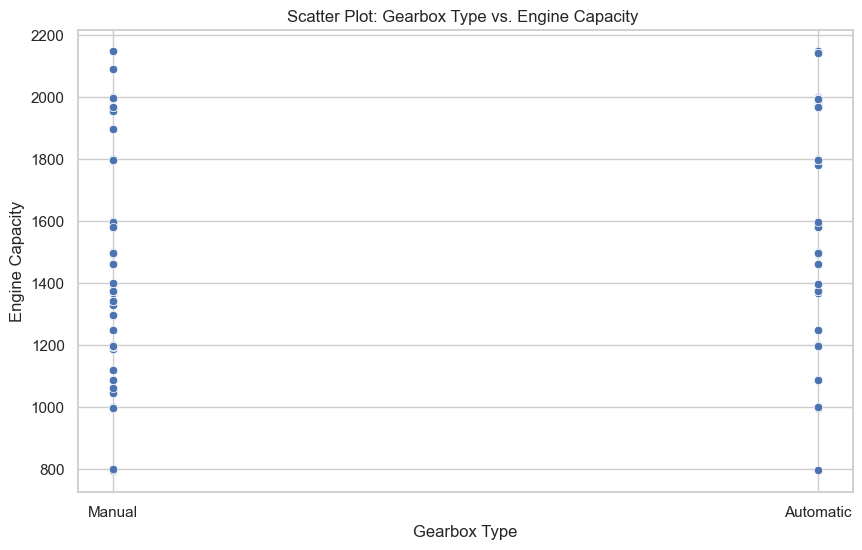

In [73]:

# Scatter Plot for Engine Capacity vs. Price with Gearbox Type as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gearbox_type', y='engine_capacity', data=transmission_dataset_clean, palette='Set2')
plt.title('Scatter Plot: Gearbox Type vs. Engine Capacity ')
plt.xlabel('Gearbox Type')
plt.ylabel('Engine Capacity')
plt.show()


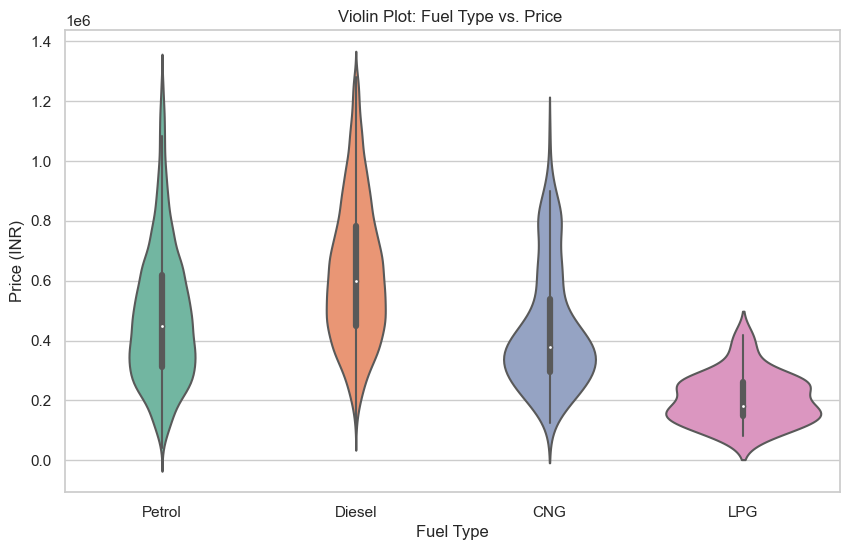

In [74]:

# Violin Plot for Type of Fuel vs. Price by Gearbox Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_of_fuel', y='price', data=transmission_dataset_clean, split=True, palette='Set2')
plt.title('Violin Plot: Fuel Type vs. Price ')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()


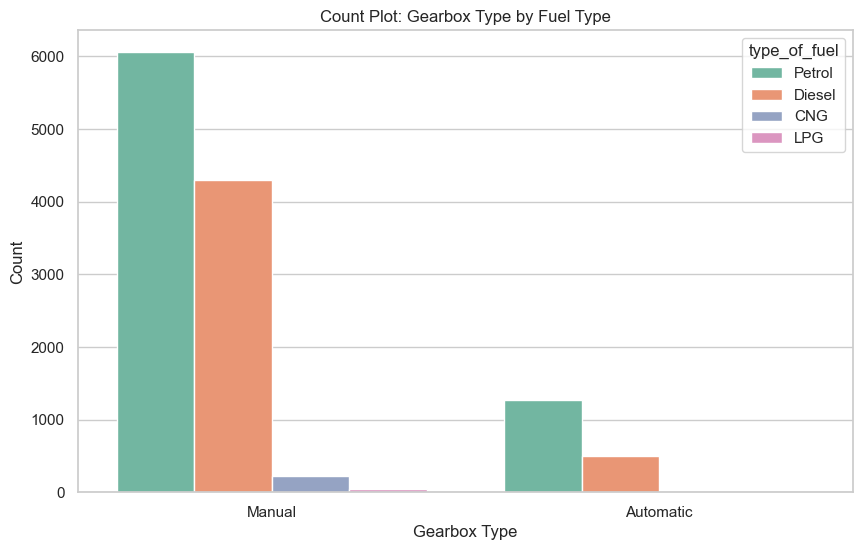

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gearbox_type', hue='type_of_fuel', data=transmission_dataset_clean, palette='Set2')
plt.title('Count Plot: Gearbox Type by Fuel Type')
plt.xlabel('Gearbox Type')
plt.ylabel('Count')
plt.show()

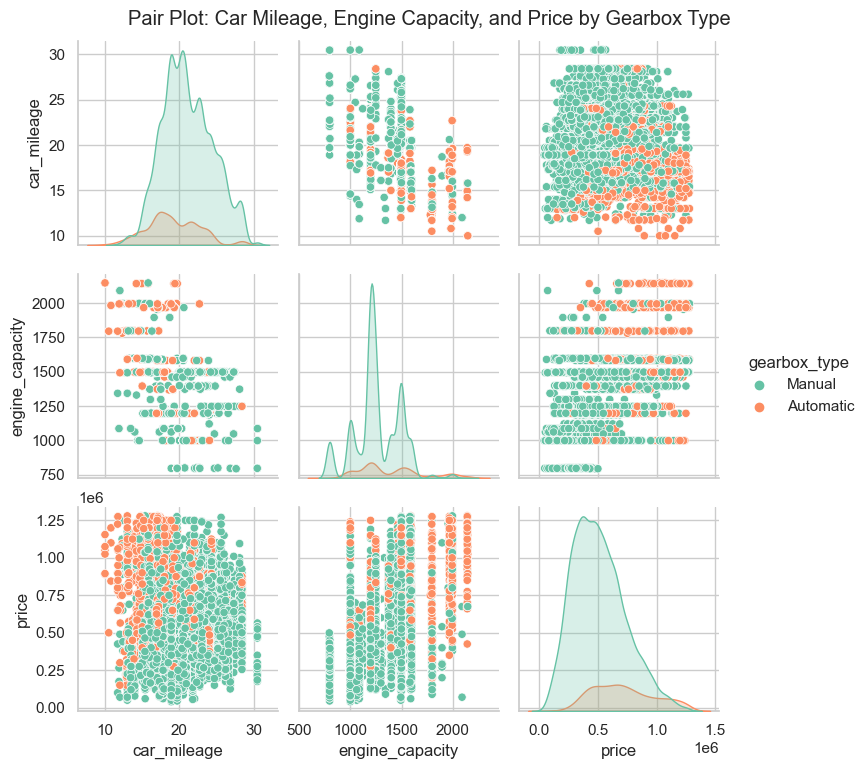

In [53]:
# Multivariate Analysis
#  Pair Plot for Car Mileage, Engine Capacity, and Price with Gearbox Type as Hue
sns.pairplot(transmission_dataset_clean, hue='gearbox_type', diag_kind='kde', palette='Set2', height=2.5)
plt.suptitle('Pair Plot: Car Mileage, Engine Capacity, and Price by Gearbox Type', y=1.02)
plt.show()

In [76]:
transmission_dataset_clean.head()

type_of_fuel gearbox_type  car_mileage  engine_capacity   price
0       Petrol       Manual        19.70              796  120000
1       Petrol       Manual        18.90             1197  550000
2       Petrol       Manual        17.00             1197  215000
3       Petrol       Manual        20.92              998  226000
4       Diesel       Manual        22.77             1498  570000

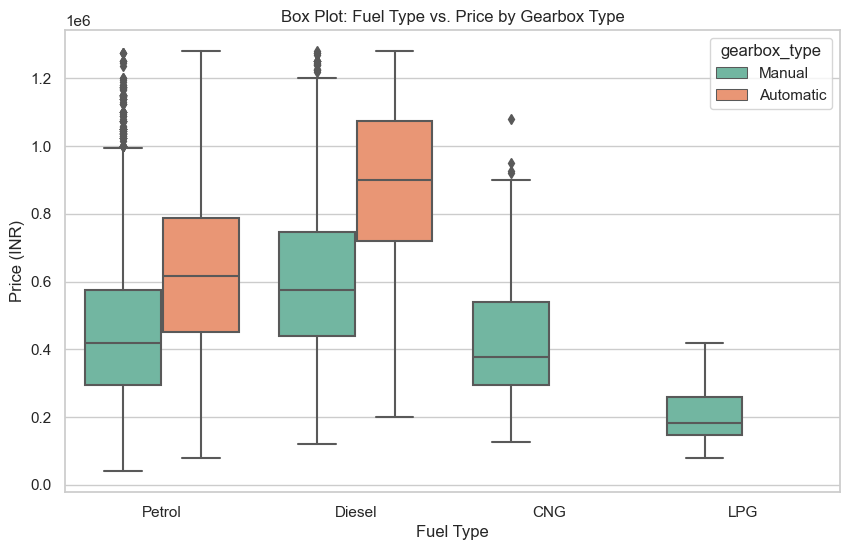

In [78]:
# Plotting type_of_fuel vs price with hue as gearbox_type

plt.figure(figsize=(10, 6))
sns.boxplot(x='type_of_fuel', y='price', hue='gearbox_type', data=transmission_dataset_clean, palette='Set2')
plt.title('Box Plot: Fuel Type vs. Price by Gearbox Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()


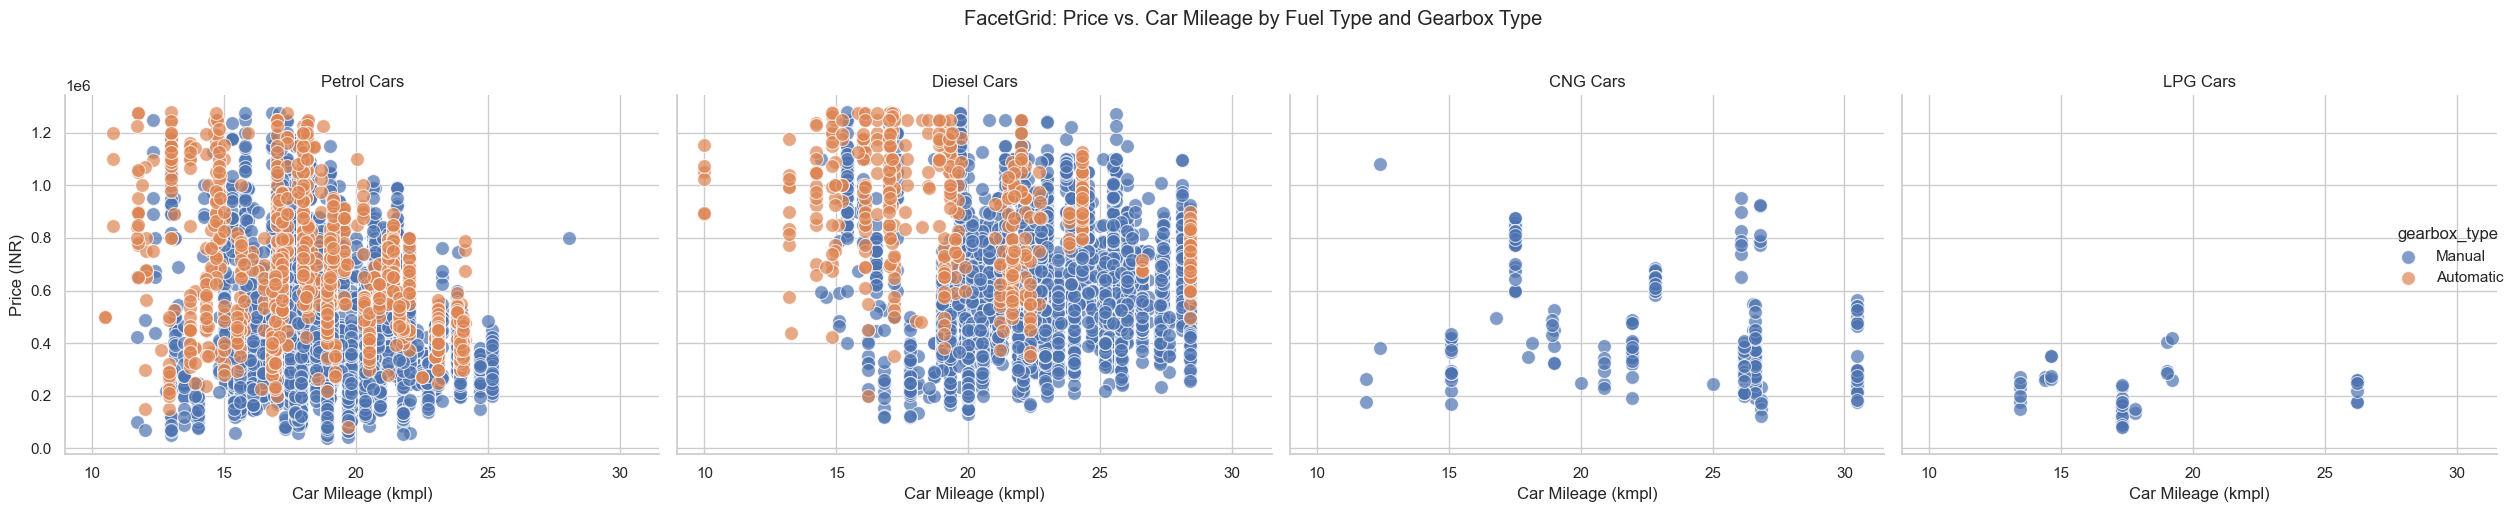

In [79]:
# FacetGrid: Car Mileage vs Price by Fuel Type and Gearbox Type
g = sns.FacetGrid(transmission_dataset_clean, col="type_of_fuel", hue="gearbox_type", height=5, aspect=1.2)
g.map(sns.scatterplot, "car_mileage", "price", s=100, alpha=0.7)
g.add_legend()
g.set_axis_labels("Car Mileage (kmpl)", "Price (INR)")
g.set_titles(col_template="{col_name} Cars")
plt.suptitle('FacetGrid: Price vs. Car Mileage by Fuel Type and Gearbox Type', y=1.02)
plt.tight_layout()
plt.show()

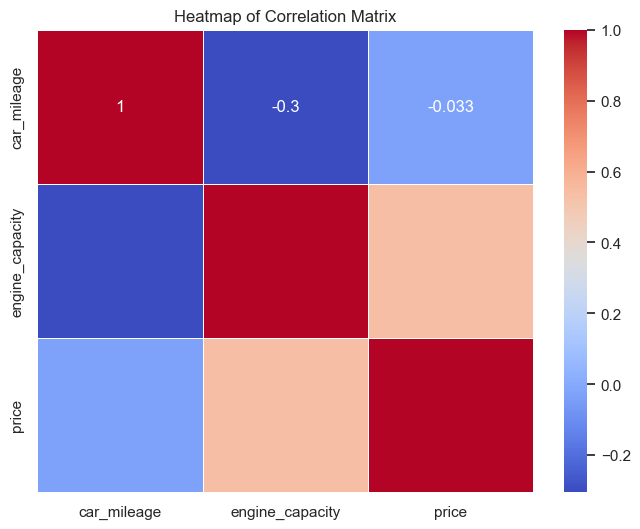

In [80]:
# Heatmap: Correlation of Continuous Variables
corr_matrix = transmission_dataset_clean[['car_mileage', 'engine_capacity', 'price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


Question 3 : How does fuel type (Petrol vs. Diesel) influence car performance in terms of mileage and price?

In [29]:
fuel_performance_dataset_clean.describe()

car_mileage         price
count  13948.000000  1.394800e+04
mean      20.072265  5.747825e+05
std        3.899249  2.785681e+05
min        9.000000  4.000000e+04
25%       17.400000  3.700000e+05
50%       20.000000  5.300000e+05
75%       22.770000  7.250000e+05
max       30.480000  1.485000e+06

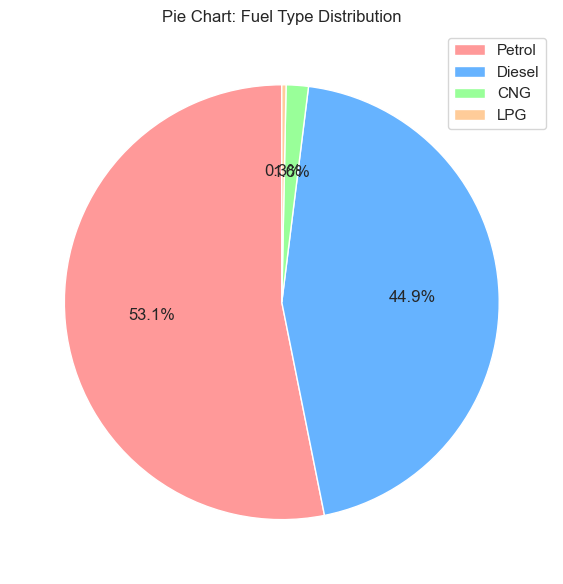

In [86]:
# Univariate Analysis
# Pie chart for Fuel Type
plt.figure(figsize=(8, 6))
fuel_counts = fuel_performance_dataset_clean['type_of_fuel'].value_counts()

# Create pie chart without labels in the pie, and add a legend instead
plt.pie(fuel_counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Pie Chart: Fuel Type Distribution')

# Add a legend to show the labels
plt.legend(labels=fuel_counts.index, loc="best")
plt.tight_layout()
plt.show()

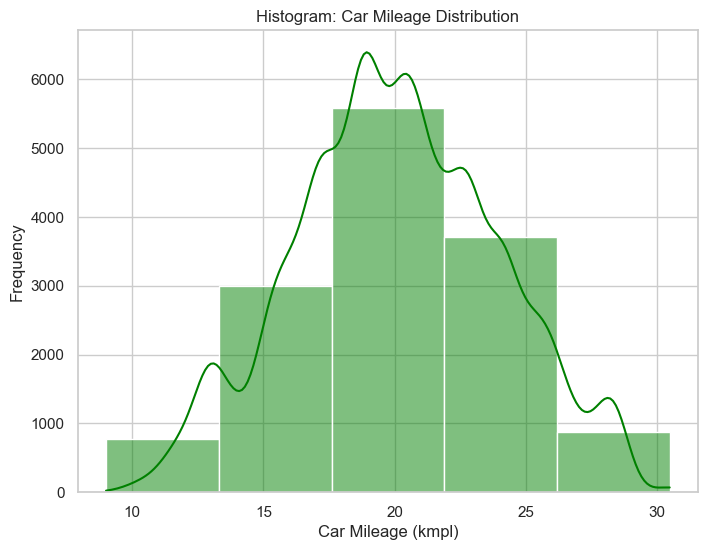

In [22]:
# Histogram for Car Mileage
plt.figure(figsize=(8, 6))
sns.histplot(fuel_performance_dataset_clean['car_mileage'], kde=True, bins=5, color='green')
plt.title('Histogram: Car Mileage Distribution')
plt.xlabel('Car Mileage (kmpl)')
plt.ylabel('Frequency')
plt.show()


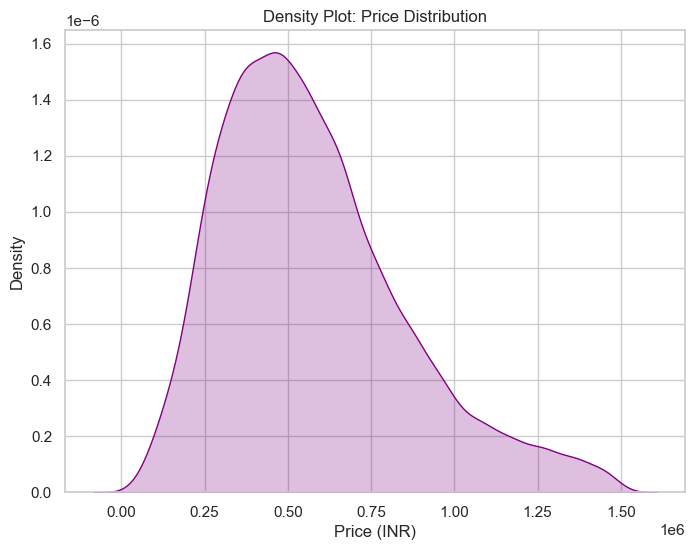

In [90]:
#  Density Plot for Price Distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(fuel_performance_dataset_clean['price'], fill=True, color='purple')
plt.title('Density Plot: Price Distribution')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.show()

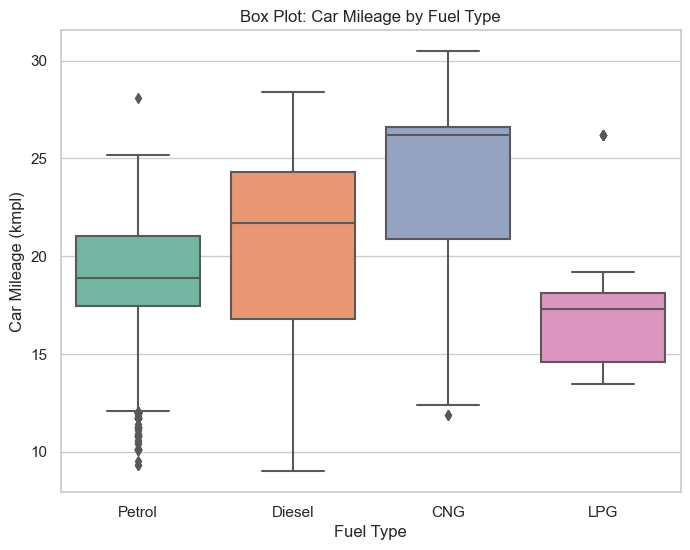

In [97]:
#Bivariate Analysis
#  Box Plot for Car Mileage by Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='type_of_fuel', y='car_mileage', data=fuel_performance_dataset_clean, palette="Set2")
plt.title('Box Plot: Car Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Car Mileage (kmpl)')
plt.show()


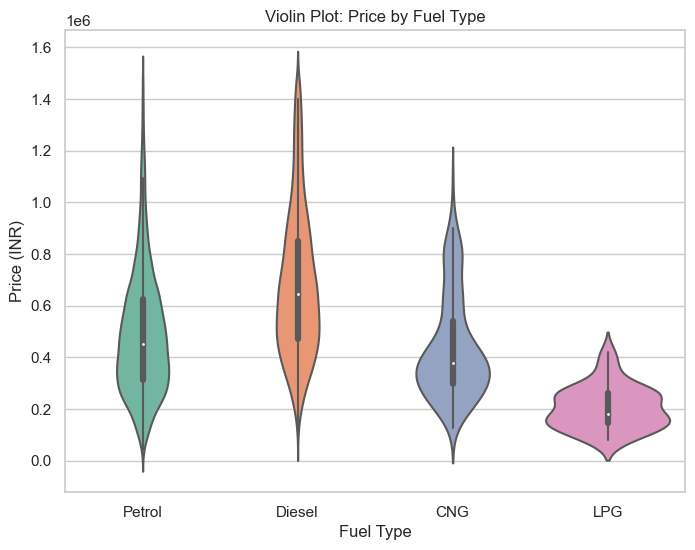

In [98]:
# Violin Plot for Price by Fuel Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='type_of_fuel', y='price', data=fuel_performance_dataset_clean, palette="Set2")
plt.title('Violin Plot: Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()

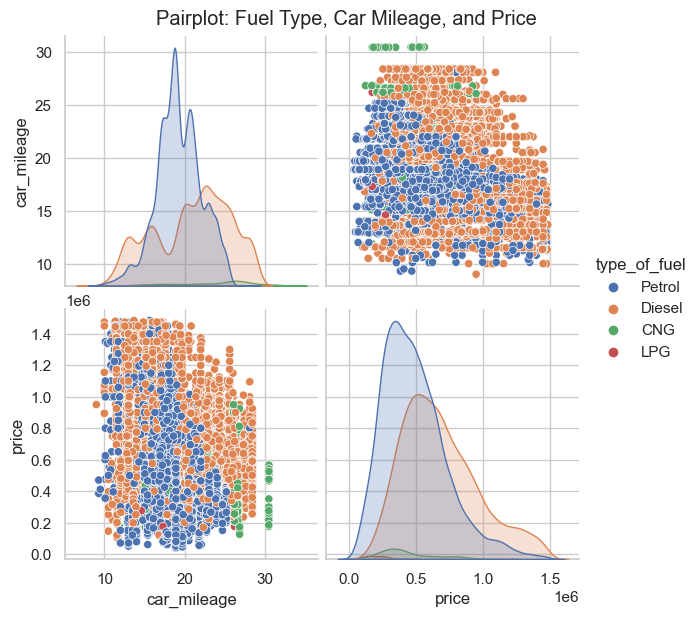

In [101]:
# Multivariate Analysis
sns.pairplot(fuel_performance_dataset_clean, hue='type_of_fuel', height=3, diag_kind='kde')
plt.suptitle('Pairplot: Fuel Type, Car Mileage, and Price', y=1.02)
plt.show()

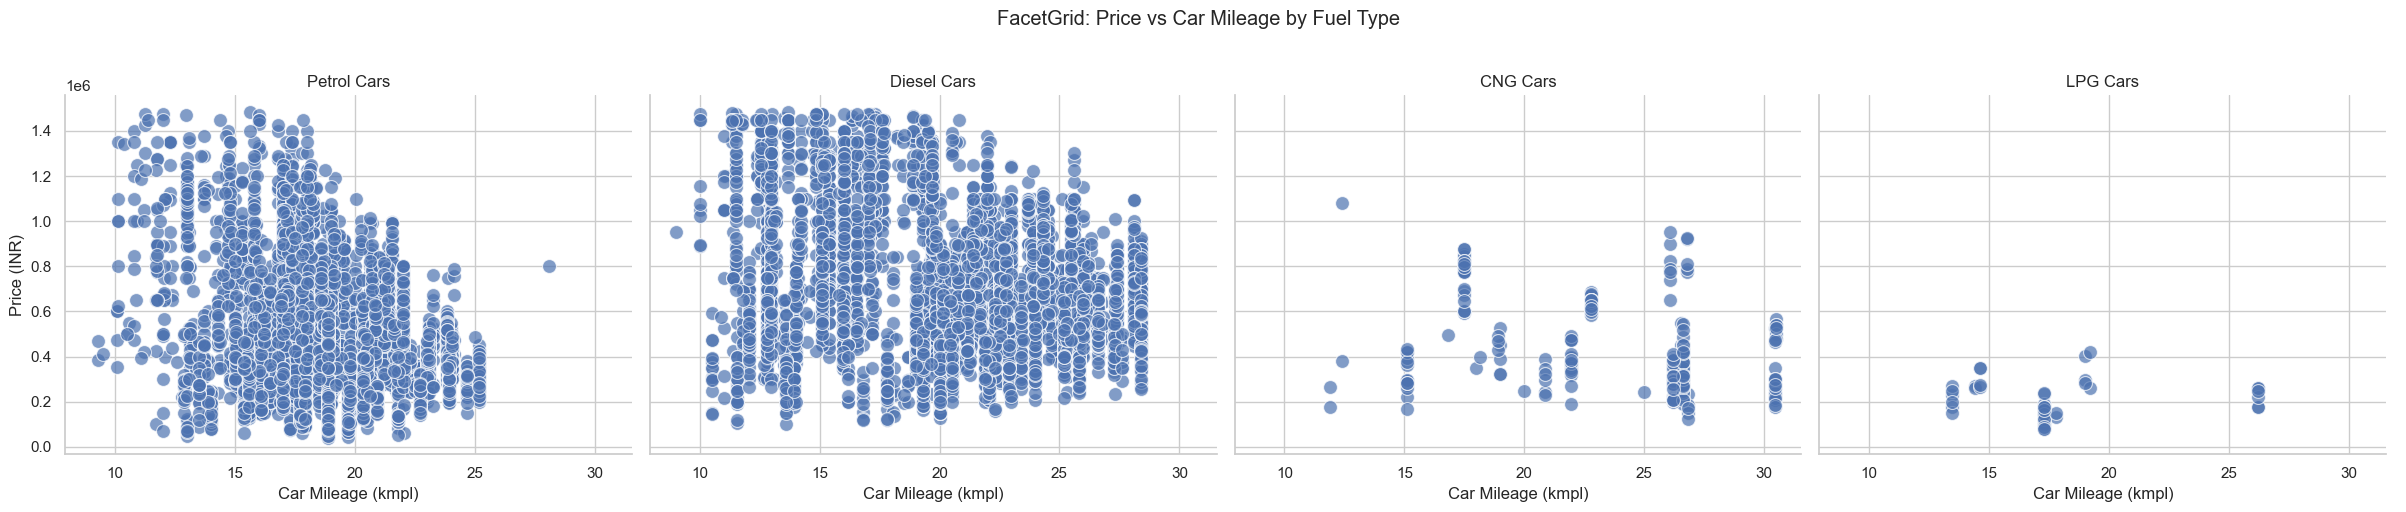

In [21]:
# FacetGrid: Car Mileage vs Price by Fuel Type
g = sns.FacetGrid(fuel_performance_dataset_clean, col="type_of_fuel", height=5, aspect=1.2)
g.map(sns.scatterplot, "car_mileage", "price", s=100, alpha=0.7)
g.add_legend()
g.set_axis_labels("Car Mileage (kmpl)", "Price (INR)")
g.set_titles(col_template="{col_name} Cars")
plt.suptitle('FacetGrid: Price vs Car Mileage by Fuel Type', y=1.02)
plt.tight_layout()
plt.show()



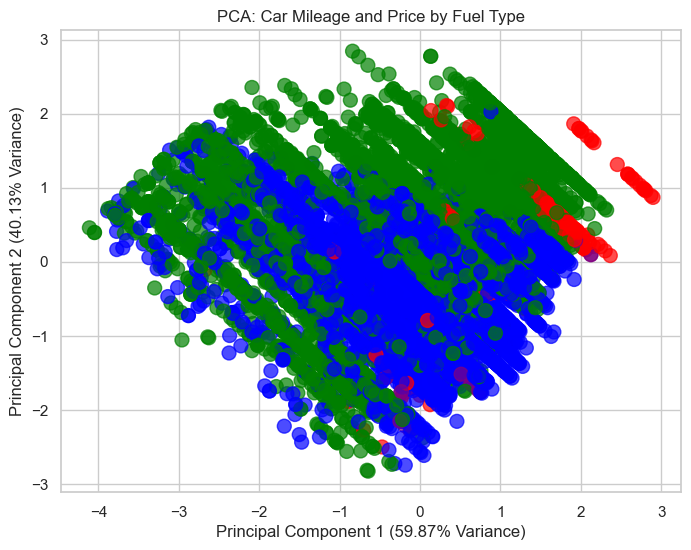

Explained variance by each component: [0.59871723 0.40128277]


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Standardize the data (scaling the features so they have unit variance and mean of 0)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(fuel_performance_dataset_clean[['car_mileage', 'price']])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a color map for fuel type
color_map = fuel_performance_dataset_clean['type_of_fuel'].map({'Petrol': 'blue', 'Diesel': 'green','LPG':'purple','CNG':'red'})

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_map, s=100, alpha=0.7)
plt.title('PCA: Car Mileage and Price by Fuel Type')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

## 4. Conclusion 

# Answer the questions

## Question 1 Insights

1. Univariate Analysis Insights:

- Age of Vehicle: The distribution shows that the majority of cars are clustered between 5 to 10 years old. Older cars tend to have slightly more variance in mileage performance, but age alone doesn't show significant insights into high mileage.

- Kilometers Driven: Cars with lower kilometers driven are more frequent, but the distribution is right-skewed, showing that cars with more kilometers driven are less common. Mileage might start to decrease with more kilometers driven.

- Fuel Type: Diesel cars appear less frequent but are known for providing higher mileage compared to petrol cars, which dominate the distribution.

- Engine Capacity: The distribution shows that most cars have engine capacities ranging from 1000cc to 1500cc. Larger engines may correlate with lower mileage.

- Mileage: The histogram shows a distribution of mileage with a central tendency between 15 to 20 kmpl, suggesting that most cars achieve moderate mileage.

- Transmission Type: Manual transmission cars are more frequent, and manual transmissions generally provide better mileage compared to automatic transmissions.

2. Bivariate Analysis Insights:

- Age of Vehicle vs Car Mileage: The scatterplot shows a weak negative correlation between age and mileage. Older cars generally have lower mileage, but the relationship isn't overly strong.

- Kilometers Driven vs Car Mileage: As expected, cars with more kilometers driven tend to have slightly lower mileage, though this is not a strong correlation. The mileage distribution remains fairly consistent for lower kilometers driven.

- Mileage by Fuel Type: Diesel cars, on average, offer higher mileage compared to petrol cars. This is a clear and strong differentiation between the two fuel types.

- Engine Capacity vs Car Mileage: There is a strong negative correlation between engine capacity and mileage. Cars with smaller engines have higher mileage, while larger engines (above 1500cc) are associated with lower mileage.

3. Multivariate Analysis Insights:

- Correlation Matrix: The heatmap shows moderate negative correlations between engine_capacity and car_mileage, as well as age_of_vehicle and car_mileage. Kilometers_driven has a weaker negative correlation with mileage, suggesting that engine size and age are more critical factors in determining fuel efficiency.

- FacetGrid: Mileage vs Age of Vehicle by Fuel Type: Across both fuel types, mileage decreases as cars age, but diesel cars maintain a higher average mileage compared to petrol cars over time.

- FacetGrid: Mileage vs Kilometers Driven by Fuel Type: The pattern is consistent across both fuel types—mileage decreases as kilometers driven increase, but diesel cars generally maintain higher mileage.

- FacetGrid: Mileage vs Engine Capacity by Fuel Type: The inverse relationship between engine capacity and mileage is evident across both fuel types. Diesel cars still outperform petrol cars in mileage even with larger engine sizes, but petrol cars with smaller engines have more variance.

Transmission Type vs Car Mileage by Fuel Type: Manual transmission cars generally provide higher mileage than automatic ones. This is true for both fuel types, but more pronounced for petrol cars.

## Question 2 Insights

1. Univariate Analysis Insights:

- Transmission Type Distribution: The pie chart reveals that manual transmission vehicles dominate the dataset, making up a larger percentage than automatic transmission vehicles. This could influence the distribution of selling prices.

- Fuel Type Distribution: Petrol vehicles are more common than diesel and other fuel types. This could suggest that petrol cars are more readily available, and hence the pricing differences could be influenced by fuel types.

- Engine Capacity Distribution: Most vehicles have smaller engines, generally ranging between 1000cc and 1500cc, with fewer vehicles having larger engine capacities.

- Selling Price Distribution: The price distribution shows a wide range with a right-skewed pattern, indicating more affordable cars are common, but high-priced cars also exist, likely with better features or higher specifications.

- Car Mileage Distribution: The distribution of car mileage shows that many cars have mileage between 15 to 20 kmpl, typical for average-performance vehicles in this dataset.


2. Bivariate Analysis Insights:

- Selling Price by Transmission Type: Manual transmission cars generally have a lower price range compared to automatic transmission cars. This might reflect the higher cost and demand for automatic cars, especially for more recent models.

- Engine Capacity by Transmission Type: Vehicles with automatic transmissions tend to have slightly larger engine capacities compared to manual transmission vehicles, which could be one reason for the higher price of automatic cars.

- Car Mileage vs Price: There’s no strong relationship between car mileage and selling price, but cars with lower mileage tend to have slightly higher prices, likely because they are in better condition or newer.

- Fuel Type vs Price: Diesel vehicles tend to command a higher price compared to petrol vehicles. This could be due to their superior fuel efficiency and longer lifespan.
Engine Capacity vs Price:

- Vehicles with larger engines tend to have higher prices, which is consistent with the idea that larger engine vehicles offer more power or features that justify the cost.

3. Multivariate Analysis Insights:

- Pair Plot of Car Mileage, Engine Capacity, and Price: The pair plot reveals that price tends to increase with engine capacity, while car mileage has a moderate negative relationship with price. Gearbox type doesn't strongly impact car mileage but does affect pricing—automatic vehicles generally have higher prices.

- Box Plot: Fuel Type vs. Price by Gearbox Type: Diesel cars, whether manual or automatic, generally have higher prices than petrol cars. Among both petrol and diesel cars, automatic transmission vehicles have higher prices.

- FacetGrid: Car Mileage vs. Price by Fuel Type and Gearbox Type: For both petrol and diesel cars, automatic transmission vehicles tend to have a wider range of prices. Diesel automatic cars appear to have the highest price, likely due to a combination of superior mileage and higher demand for diesel-powered automatics.

- Heatmap of Correlation Matrix: The heatmap shows that engine capacity has a strong positive correlation with price, meaning larger engines result in higher prices. Car mileage, on the other hand, has a weaker, slightly negative correlation with price.

## Question 3 Insights

1. Univariate Analysis Insights:

- Fuel Type Distribution: The pie chart shows that petrol cars dominate the dataset, making up a larger portion compared to diesel cars. This difference in representation could impact the average mileage and price trends observed in the data.

- Car Mileage Distribution: The histogram shows a spread of car mileage, with a higher frequency of cars achieving mileage between 15 to 20 kmpl. There’s a fairly normal distribution of mileage, indicating that most cars perform in a similar range.

- Price Distribution: The price distribution has a right skew, suggesting that more cars fall into the lower price range, with fewer cars in the higher price brackets. This could reflect the larger number of petrol cars, which tend to be more affordable compared to diesel cars.

2. Bivariate Analysis Insights:

- Car Mileage by Fuel Type: The box plot reveals a clear difference between fuel types. Diesel cars generally offer higher mileage compared to petrol cars, with less variance. Petrol cars have a wider range in mileage, but their median mileage is lower compared to diesel.

- Price by Fuel Type: The violin plot shows that diesel cars tend to have higher prices, while petrol cars exhibit a wider price range. Diesel cars appear to have fewer outliers and a more concentrated distribution of higher prices. This likely reflects the increased fuel efficiency and durability of diesel engines.


3. Multivariate Analysis Insights:
- Pairplot: Fuel Type, Car Mileage, and Price: The pairplot shows clear separation between petrol and diesel cars when examining mileage and price together. Diesel cars tend to cluster at higher mileage and price points, while petrol cars are spread more evenly across lower price ranges with variable mileage performance.

- FacetGrid: Price vs. Car Mileage by Fuel Type: The FacetGrid highlights that while diesel cars achieve higher mileage, they are also priced higher than petrol cars. Petrol cars show more variance in mileage, but generally cluster around lower prices and lower mileage performance. Diesel cars demonstrate a more linear relationship between higher mileage and higher price.

- Insights from PCA Analysis:
>> - Explained Variance: Principal Component 1 explains 81.63% of the variance, while Principal Component 2 explains 18.37%, meaning these two components capture almost all the information related to mileage and price.
>> - Diesel Cars: Diesel cars (green) are closely clustered, indicating consistent mileage and pricing. They tend to offer better fuel efficiency and are priced higher with less variability compared to petrol cars.
>> - Petrol Cars: Petrol cars (blue) are more widely spread, showing greater variability in both mileage and price. Petrol cars cater to a broader market, with a mix of lower-priced, lower-mileage vehicles and some higher-end models.
>> - Other Fuel Types: LPG (purple) and CNG (red) are few in number and scattered, indicating less consistency and less influence on the overall market compared to petrol and diesel vehicles.



## 5. Summary

(summarize your results) 

## Question 1 Summary

From the analyses, it's clear that several factors contribute to high mileage in used cars:
- Fuel Type: Diesel cars consistently offer higher mileage compared to petrol cars across all analyses.
- Engine Capacity: Cars with smaller engine capacities (below 1500cc) are associated with higher mileage, especially petrol cars.
- Age of Vehicle: As cars get older, their mileage tends to decrease, although the relationship is not strong.
- Transmission Type: Manual transmissions tend to provide better mileage than automatic transmissions.

## Question 2 Summary

From the analyses, we can conclude that the combination of vehicle characteristics significantly influences the selling price of both automatic and manual transmission cars. Key insights include:

- Transmission Type: Automatic transmission vehicles generally command higher prices compared to manual transmission vehicles.
- Fuel Type: Diesel cars are priced higher than petrol cars, especially in combination with automatic transmission.
- Engine Capacity: Larger engines significantly increase the price of a vehicle, particularly for automatic transmission cars.
- Car Mileage: Although mileage plays a role, it is less critical than engine capacity and transmission type in determining price.

## Question 3 Summary

The analysis highlights the following key insights regarding the influence of fuel type on car performance:

- Diesel cars consistently outperform petrol cars in terms of mileage. Diesel cars offer better fuel efficiency, leading to higher mileage values, with a more concentrated distribution of performance.
- Diesel cars are priced higher than petrol cars. This is likely due to their better mileage, fuel efficiency, and durability, which makes them more desirable and justifies the higher price.
- Petrol cars show a wider variance in both mileage and price, suggesting that there are more affordable petrol cars on the market, but their performance is not as consistent as diesel vehic
- PCA Analysis insights:
>> - Diesel cars provide better and more consistent mileage and are generally priced higher, making them more efficient and valuable in the used car market.
>> - Petrol cars display greater variation in both mileage and price, serving a wider market with more affordable options but lower overall performance in fuel efficiency.
>> - The PCA confirms that mileage and price are key differentiators between these fuel types, with diesel cars standing out for their superior performance and pricing stability.les.

## References

> provide a list of references

1. Pandas Tutorial: https://pandas.pydata.org/getting_started.html

2. Matplotlib: https://www.geeksforgeeks.org/matplotlib-tutorial/

3. Seaborn Tut: https://www.datacamp.com/tutorial/seaborn-python-tutorial

4. Exploratory Data Analysis: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

5. Outlier Detection: https://www.geeksforgeeks.org/what-is-outlier-detection/